# Group 4:
##1. Anish Borkar (210220)
##2. Dyuti Dasmahapatra (210424)
##3. Godavarthi Sai Nikhil (210214)
##4. Anoushka Srivastava (210232)
##5. Nichenametla Karthik Raja (210371)

## The dataset we have selected is churn12. This dataset is about mobile customers some of whom drop their provider.

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '20px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hello in ")
print("...in larger font ")

<IPython.core.display.Javascript object>

Hello in 
...in larger font 


In [ ]:
# import required files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

Mounted at /content/drive


In [ ]:
# importing dataset as df
df = pd.read_csv('/content/drive/MyDrive/MLCSE2ndYr/churn12.csv')

<IPython.core.display.Javascript object>

# Data Preparation


In [ ]:
# first 5 rows
df.head()

<IPython.core.display.Javascript object>

,customer_id,age,job,urban_rural,marital_status,kids,disposable_income,mobiles_changed,mobile_age,own_smartphone,...,incoming_calls,day_night_call_ratio,day_night_call_delta,calls_dropped,loyalty_months,complaint_calls,promo_calls_made,promo_offers_accepted,new_numbers_called,customer_dropped
0,1067807,0,NaN,NaN,unknown,False,0,3,60,True,...,16.0,1.111703,-8.620211,5.67,11,8.33,0,0,0,true
1,1004703,48,professional,urban,unknown,False,801,3,869,True,...,0.0,3.369668,-14.629682,1.00,37,0.00,0,0,1,false
2,1053259,0,NaN,urban,unknown,False,0,1,363,True,...,4.0,0.578274,8.105267,8.00,12,0.00,0,0,0,true
3,1001943,62,NaN,rural,unknown,False,623,1,1307,False,...,0.0,0.000000,-3.514852,0.00,43,0.00,0,0,0,true
4,1014068,44,own_business,urban,yes,False,534,1,765,True,...,0.0,7.154506,-7.523756,1.00,25,0.00,0,0,2,false


In [ ]:
# Show the shape of the dataset
print(f'Dimension of dataframe {df.shape[0]} rows and {df.shape[1]} columns')

<IPython.core.display.Javascript object>

Dimension of dataframe 8550 rows and 33 columns


The dataset contains 33 columns. The feautes are:

1. customer_id: Unique identifier for each customer.
2. age: Age of the customer.
3. job: Occupation or profession of the customer.
4. urban_rural: Indicates whether the customer resides in an urban or rural area.
5. marital_status: Marital status of the customer.
6. kids: Number of children the customer has.
7. disposable_income: Disposable income of the customer.
8. mobiles_changed: Number of times the customer has changed their mobile device.
9. mobile_age: Age of the current mobile device owned by the customer.
10. own_smartphone: Indicates whether the customer owns a smartphone.
11. current_mobile_price: Price of the customer's current mobile device.
12. credit_card_type: Type of credit card held by the customer.
13. own_house: Indicates whether the customer owns a house.
14. own_cr_card: Indicates whether the customer owns a credit card.
15. monthly_bill: Monthly bill amount for mobile service.
16. call_mins: Total call minutes used by the customer.
17. basic_plan_amount: Amount charged for the basic mobile service plan.
18. extra_mins: Additional minutes used by the customer beyond the basic plan.
19. roam_call_mins: Roaming call minutes used by the customer.
20. call_mins_delta: Difference in call minutes compared to the previous billing period.
21. bill_amount_delta: Difference in bill amount compared to the previous billing period.
22. incoming_call_mins: Total incoming call minutes received by the customer.
23. outgoing_calls: Total number of outgoing calls made by the customer.
24. incoming_calls: Total number of incoming calls received by the customer.
25. day_night_call_ratio: Ratio of call minutes during the day versus night.
26. day_night_call_delta: Difference in call minutes between day and night compared to the previous billing period.
27. calls_dropped: Number of calls dropped by the customer.
28. loyalty_months: Number of months the customer has been with the mobile service provider.
29. complaint_calls: Number of customer complaints made.
30. promo_calls_made: Number of promotional calls made by the customer.
31. promo_offers_accepted: Number of promotional offers accepted by the customer.
32. new_numbers_called: Number of new phone numbers called by the customer.
33. customer_dropped: Indicates whether the customer has dropped or churned from the mobile service provider.

In [ ]:
# information regarding all columns 
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            8550 non-null   int64  
 1   age                    8550 non-null   int64  
 2   job                    2181 non-null   object 
 3   urban_rural            4499 non-null   object 
 4   marital_status         8550 non-null   object 
 5   kids                   8550 non-null   bool   
 6   disposable_income      8550 non-null   int64  
 7   mobiles_changed        8550 non-null   int64  
 8   mobile_age             8550 non-null   int64  
 9   own_smartphone         8550 non-null   bool   
 10  current_mobile_price   8550 non-null   float64
 11  credit_card_type       8550 non-null   object 
 12  own_house              8550 non-null   bool   
 13  own_cr_card            8550 non-null   object 
 14  monthly_bill           8550 non-null   float64
 15  call

It can be observed that job, urban_rural, marital_status, credit_card_type, own_house, own_cr_card, customer_dropped, kids, own_smartphone are of object type while the others are of int/float type

In [ ]:
# Frequency of each outcome variable
df['customer_dropped'].value_counts()

<IPython.core.display.Javascript object>

true     4289
false    4260
tru         1
Name: customer_dropped, dtype: int64

It can be observed that there is a outlier in the customer dropped columns i.e. 'tru'. Hence it needs to be dropped

<IPython.core.display.Javascript object>

<Axes: xlabel='customer_dropped', ylabel='count'>

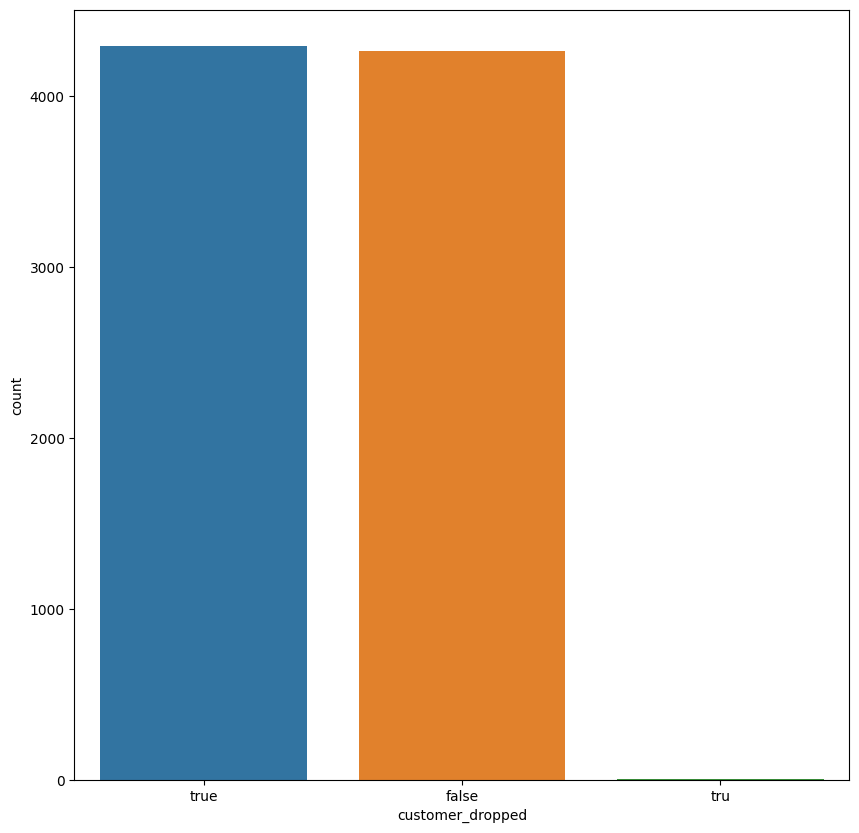

In [ ]:
# Count Plot
fig = plt.figure(figsize=(10,10))
sns.countplot(x='customer_dropped', data = df)

The outcome column has majorily two outcomes, true and false. From the graph, it can be seen that the distribution of the target variable is balanced

In [ ]:
# checking for null values
null_counts = df.isnull().sum()
print(null_counts)

<IPython.core.display.Javascript object>

customer_id                 0
age                         0
job                      6369
urban_rural              4051
marital_status              0
kids                        0
disposable_income           0
mobiles_changed             0
mobile_age                  0
own_smartphone              0
current_mobile_price        0
credit_card_type            0
own_house                   0
own_cr_card                 0
monthly_bill                0
call_mins                   0
basic_plan_amount           0
extra_mins                  0
roam_call_mins              0
call_mins_delta             0
bill_amount_delta           0
incoming_call_mins          0
outgoing_calls              0
incoming_calls              0
day_night_call_ratio        0
day_night_call_delta        0
calls_dropped               0
loyalty_months              0
complaint_calls             0
promo_calls_made            0
promo_offers_accepted       0
new_numbers_called          0
customer_dropped            0
dtype: int

<IPython.core.display.Javascript object>

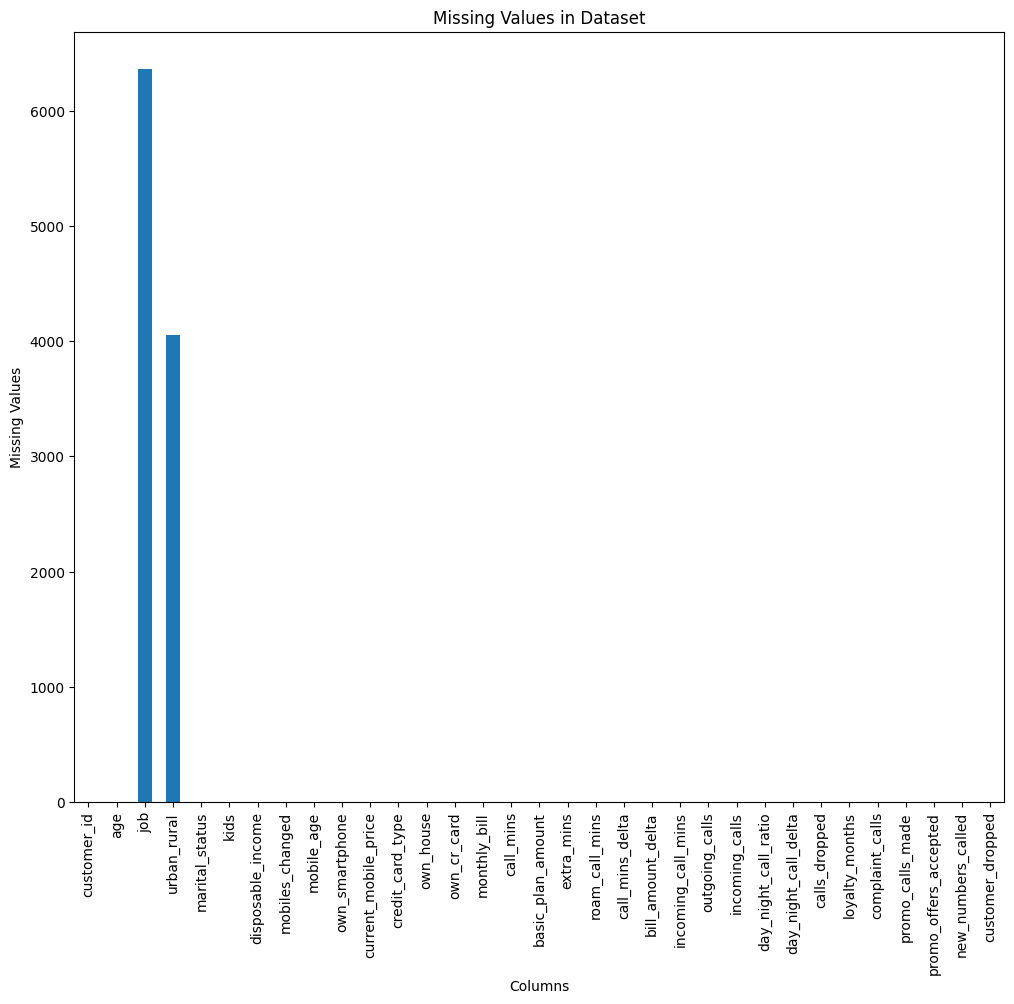

In [ ]:
plt.figure(figsize=(12, 10))
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Dataset')
plt.show()

It can be seen that job and urban_rural seem to have a lot of null values. Hence some other technique instead of dropping them should be used

In [ ]:
# removing row with target variable equal to tru
df = df.drop(df[df['customer_dropped'] == 'tru'].index)

<IPython.core.display.Javascript object>

In [ ]:
# viewing the effect
df['customer_dropped'].value_counts()

<IPython.core.display.Javascript object>

true     4289
false    4260
Name: customer_dropped, dtype: int64

In [ ]:
# converting categorical value into numerical values.
label_encoder = LabelEncoder()

categorical_columns = ['job', 'urban_rural', 'marital_status', 'credit_card_type', 'own_house', 'own_cr_card','customer_dropped','kids','own_smartphone']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

<IPython.core.display.Javascript object>

In [ ]:
# viweing the effect
df.head()

<IPython.core.display.Javascript object>

,customer_id,age,job,urban_rural,marital_status,kids,disposable_income,mobiles_changed,mobile_age,own_smartphone,...,incoming_calls,day_night_call_ratio,day_night_call_delta,calls_dropped,loyalty_months,complaint_calls,promo_calls_made,promo_offers_accepted,new_numbers_called,customer_dropped
0,1067807,0,7,7,1,0,0,3,60,1,...,16.0,1.111703,-8.620211,5.67,11,8.33,0,0,0,1
1,1004703,48,4,6,1,0,801,3,869,1,...,0.0,3.369668,-14.629682,1.00,37,0.00,0,0,1,0
2,1053259,0,7,6,1,0,0,1,363,1,...,4.0,0.578274,8.105267,8.00,12,0.00,0,0,0,1
3,1001943,62,7,1,1,0,623,1,1307,0,...,0.0,0.000000,-3.514852,0.00,43,0.00,0,0,0,1
4,1014068,44,3,6,2,0,534,1,765,1,...,0.0,7.154506,-7.523756,1.00,25,0.00,0,0,2,0


In [ ]:
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8549 entries, 0 to 8549
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            8549 non-null   int64  
 1   age                    8549 non-null   int64  
 2   job                    8549 non-null   int64  
 3   urban_rural            8549 non-null   int64  
 4   marital_status         8549 non-null   int64  
 5   kids                   8549 non-null   int64  
 6   disposable_income      8549 non-null   int64  
 7   mobiles_changed        8549 non-null   int64  
 8   mobile_age             8549 non-null   int64  
 9   own_smartphone         8549 non-null   int64  
 10  current_mobile_price   8549 non-null   float64
 11  credit_card_type       8549 non-null   int64  
 12  own_house              8549 non-null   int64  
 13  own_cr_card            8549 non-null   int64  
 14  monthly_bill           8549 non-null   float64
 15  call

All the columns are now of numerical type ( either float or int )

<IPython.core.display.Javascript object>

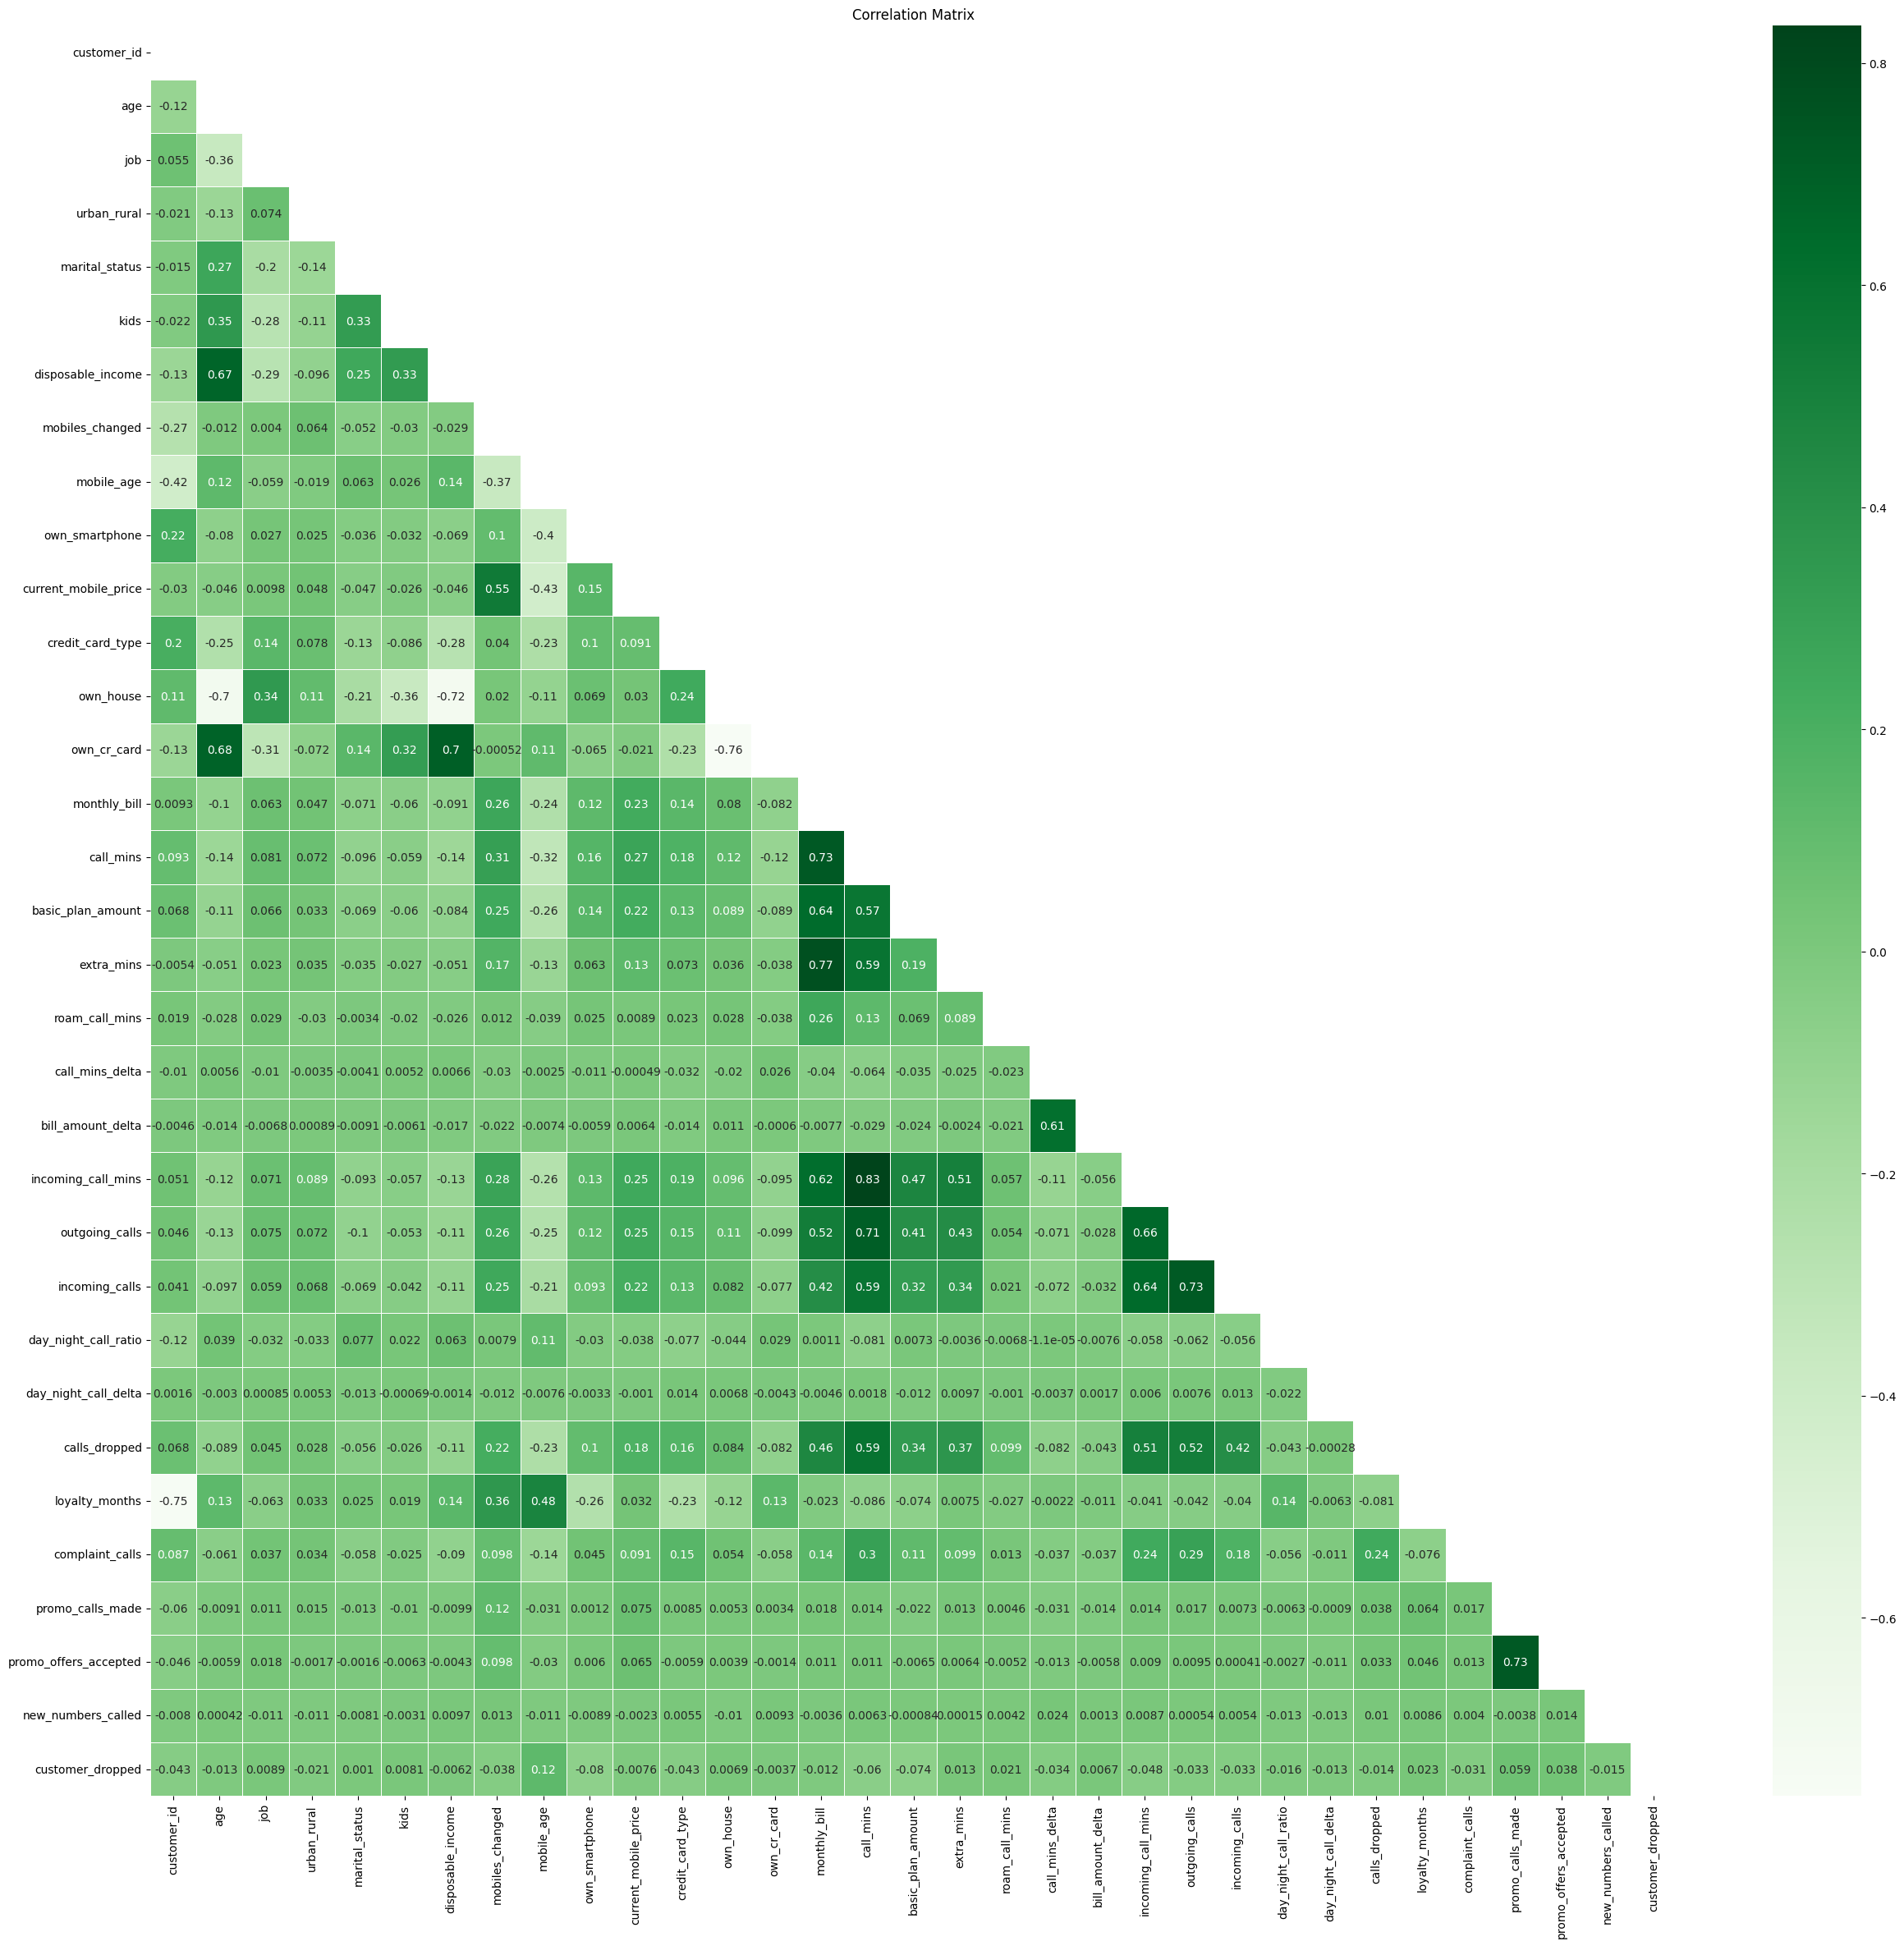

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(30, 28))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Greens', linewidths=0.5, ax=ax)

plt.title('Correlation Matrix')

plt.show()

##Feature Selection

In [ ]:
# feature selection
X = df.drop('customer_dropped', axis=1) 
y = df['customer_dropped']

k = 14
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

df_selected = pd.DataFrame(X_selected, columns=selected_features)

print("Selected Features:")
print(selected_features)


<IPython.core.display.Javascript object>

Selected Features:
Index(['customer_id', 'mobiles_changed', 'mobile_age', 'own_smartphone',
       'credit_card_type', 'call_mins', 'basic_plan_amount', 'call_mins_delta',
       'incoming_call_mins', 'outgoing_calls', 'incoming_calls',
       'complaint_calls', 'promo_calls_made', 'promo_offers_accepted'],
      dtype='object')


Taking the top 14 features, we will get the follwing features:

1. mobiles_changed
2. mobile_age
3. own_smartphone
4. credit_card_type
5. call_mins
6. basic_plan_amount
7. call_mins_delta
8. incoming_call_mins
9. outgoing_calls
10. incoming_calls
11. complaint_calls
12. promo_calls_made
13. promo_offers_accepted'
14. customer_id

Since customer_id isn't a good feature for the classification model, we will remove it and take the others.



In [ ]:
# selecing the top 13 features and the target column in df_2
selected_columns = ['mobiles_changed', 'mobile_age', 'own_smartphone', 'credit_card_type', 'call_mins', 'basic_plan_amount', 'call_mins_delta', 'incoming_call_mins', 'outgoing_calls', 'incoming_calls', 'complaint_calls', 'promo_calls_made', 'promo_offers_accepted','customer_dropped']
df_2 = df[selected_columns]

<IPython.core.display.Javascript object>

In [ ]:
# viewing the first 5 rows
df_2.head()

<IPython.core.display.Javascript object>

,mobiles_changed,mobile_age,own_smartphone,credit_card_type,call_mins,basic_plan_amount,call_mins_delta,incoming_call_mins,outgoing_calls,incoming_calls,complaint_calls,promo_calls_made,promo_offers_accepted,customer_dropped
0,3,60,1,5,452.25,4449.11,-8.645,157.79,20.00,16.0,8.33,0,0,1
1,3,869,1,0,155.50,4004.11,-1.090,0.00,3.00,0.0,0.00,0,0,0
2,1,363,1,1,660.25,4004.11,1.115,118.88,20.67,4.0,0.00,0,0,1
3,1,1307,0,0,0.00,2669.11,0.000,0.00,0.00,0.0,0.00,0,0,1
4,1,765,1,3,34.75,890.00,0.405,3.56,0.00,0.0,0.00,0,0,0


<IPython.core.display.Javascript object>

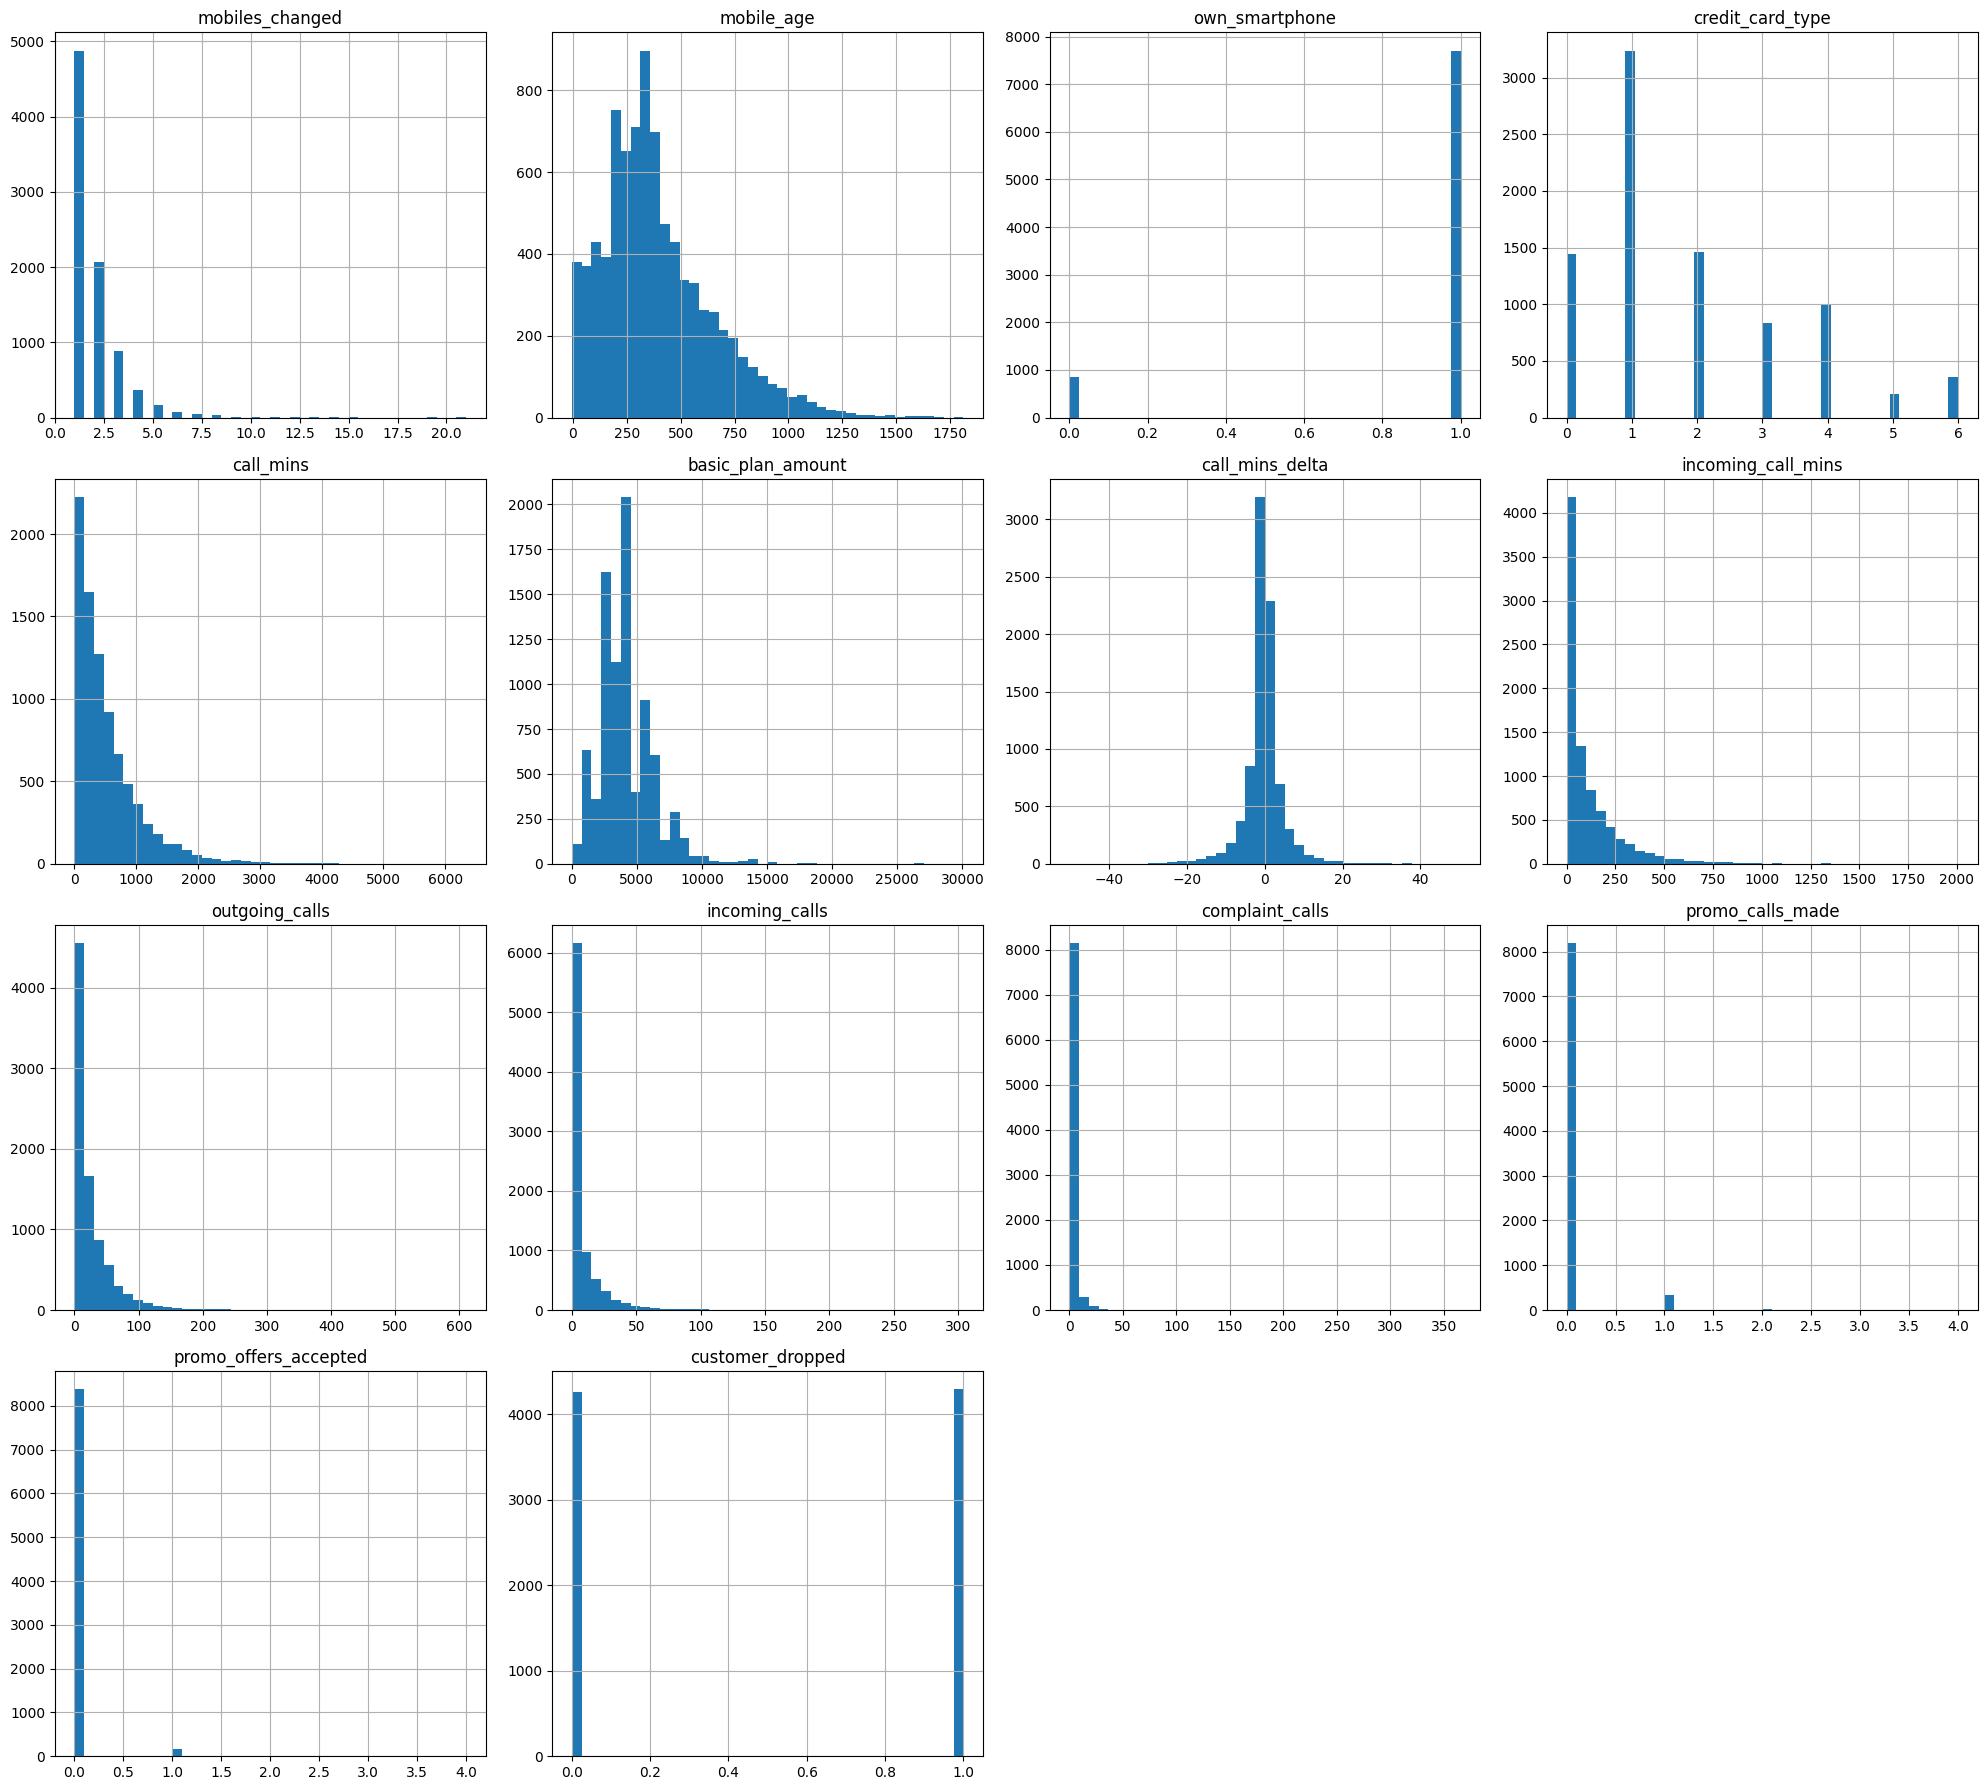

In [ ]:
# displaying histogram
df_2.hist(figsize=(20, 18),bins=40)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

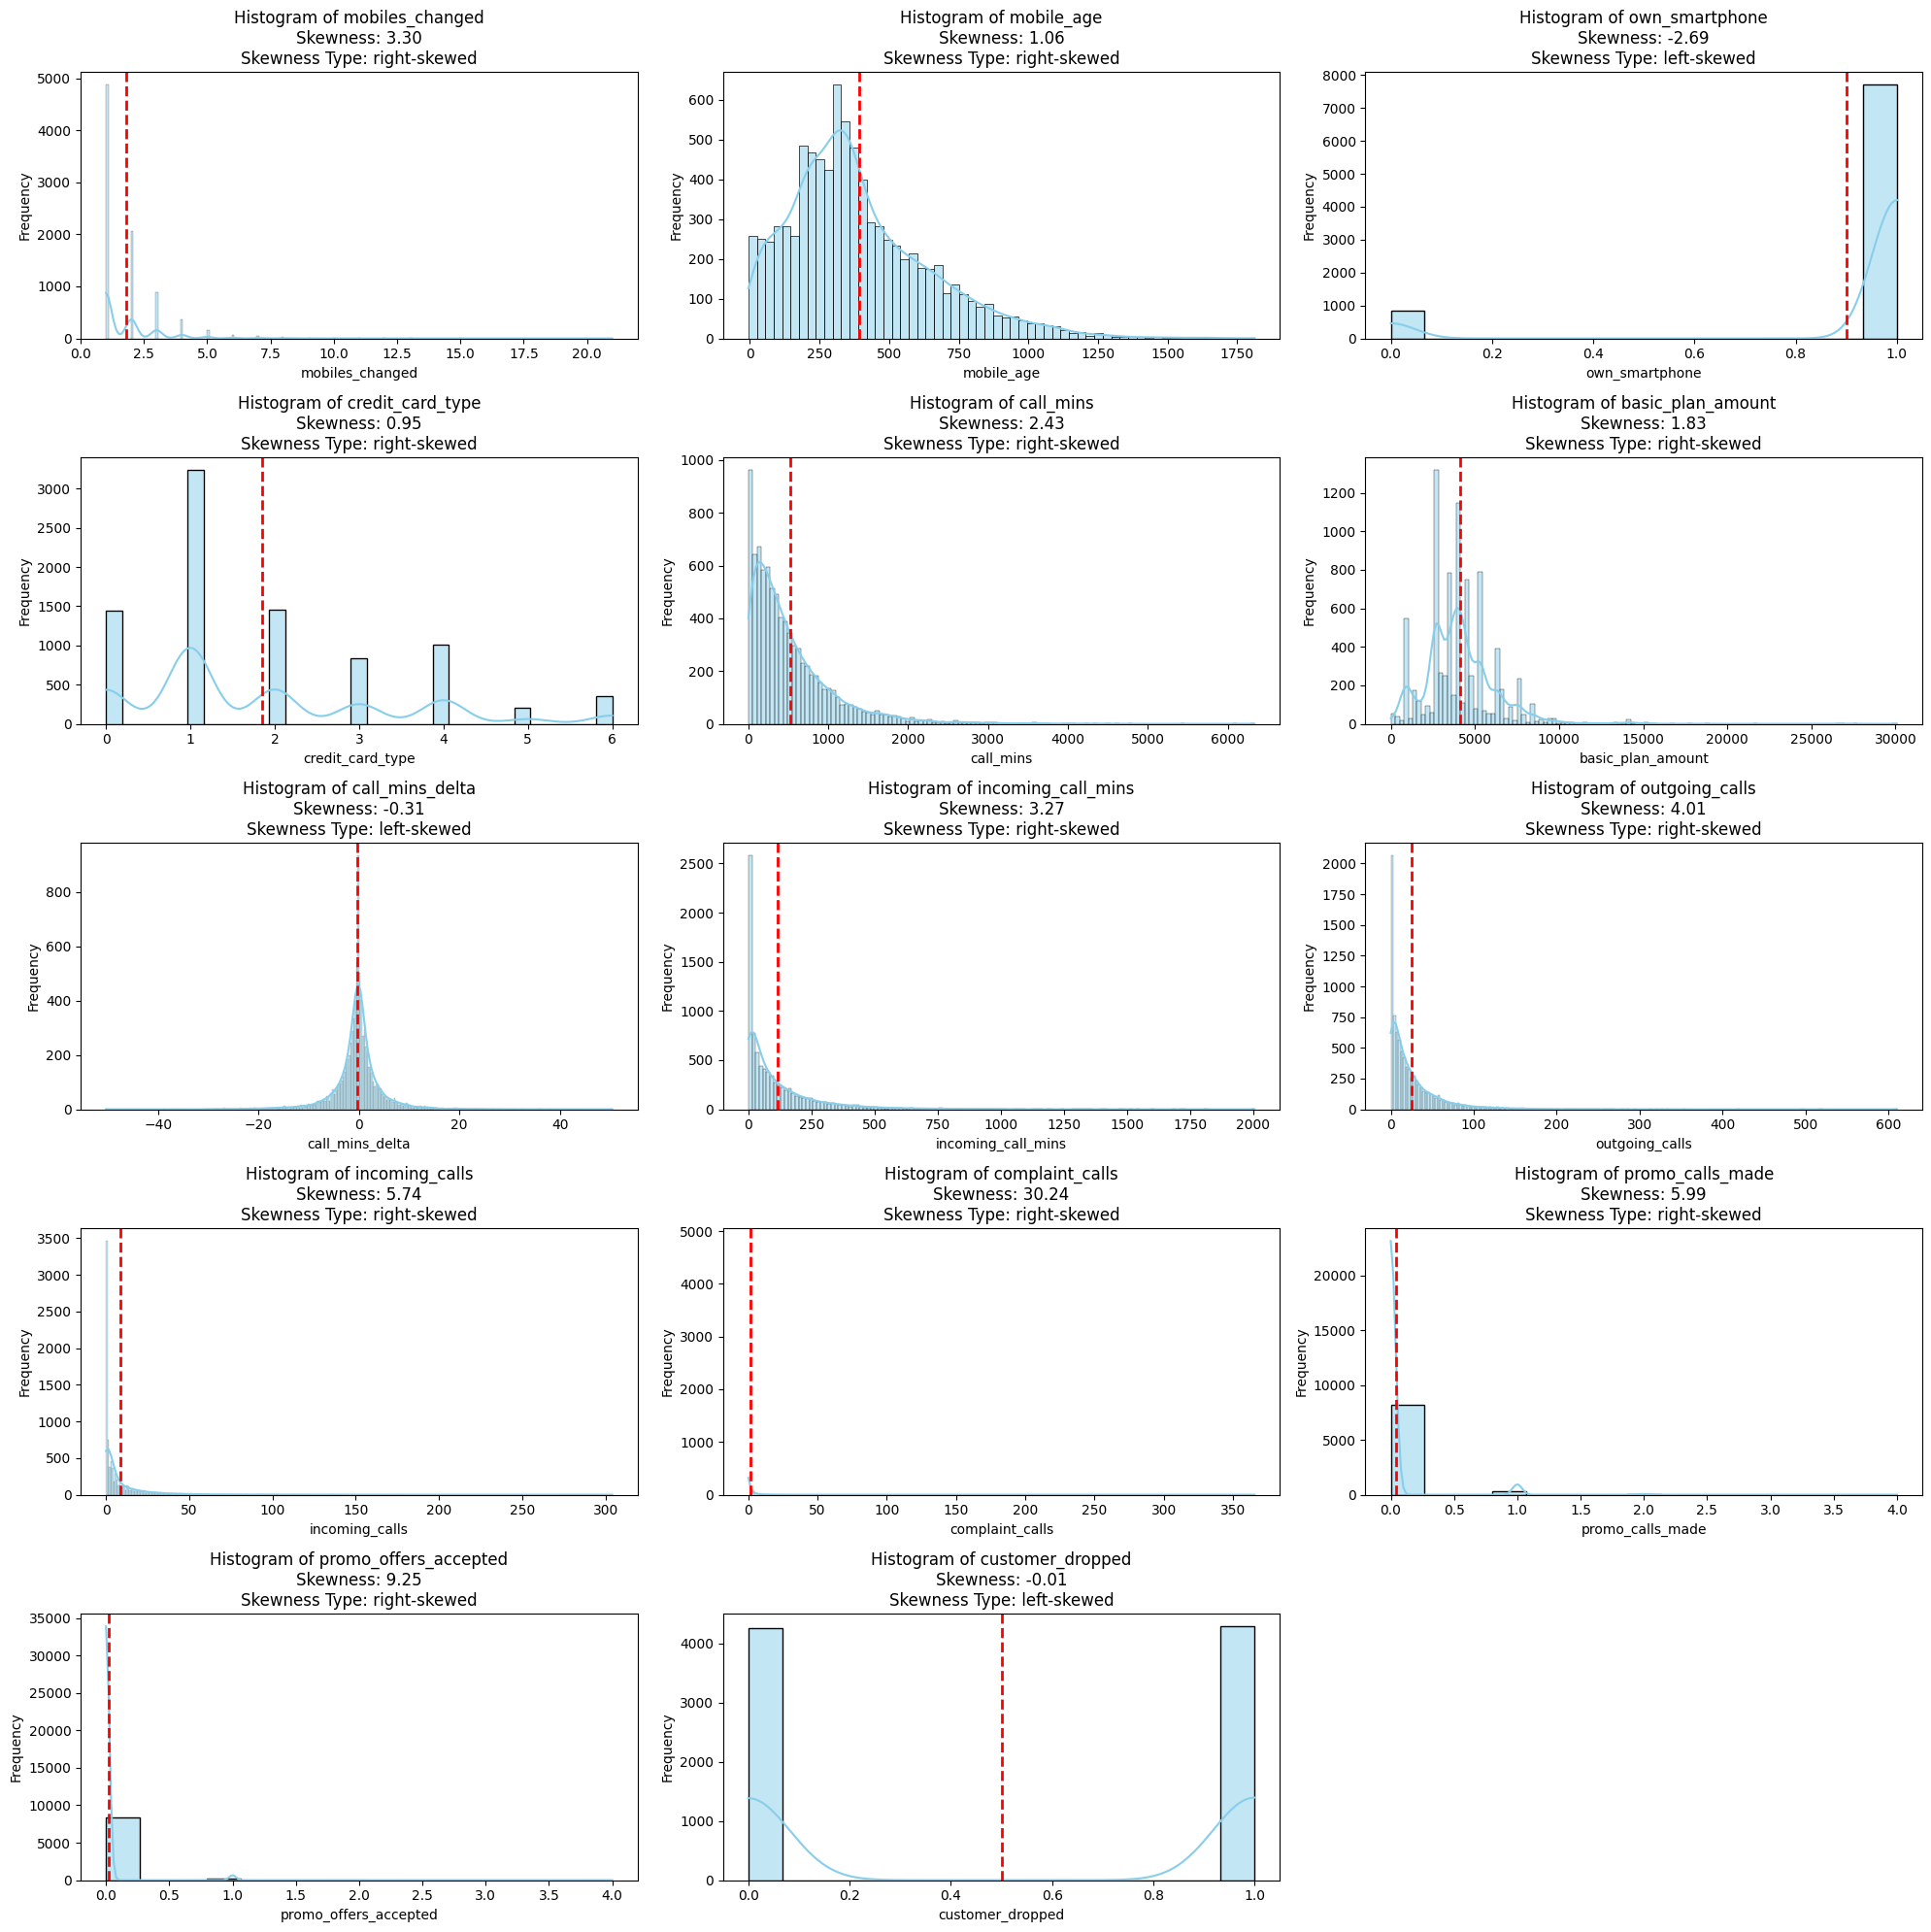

In [ ]:
# Visulatisation of skewness
n_cols = 3
n_rows = int(np.ceil(len(df_2.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df_2.columns):
    col_skewness = stats.skew(df_2[col])
    
    if col_skewness > 0:
        skewness_type = 'right-skewed'
    elif col_skewness < 0:
        skewness_type = 'left-skewed'
    else:
        skewness_type = 'approximately symmetric'
    
    sns.histplot(df_2[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].axvline(df_2[col].mean(), color='red', linestyle='dashed', linewidth=2)
    
    axes[i].set_title("Histogram of {}\nSkewness: {:.2f}\nSkewness Type: {}".format(col, col_skewness, skewness_type))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(df_2.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# skewness of features
skewness = df_2.skew()
print("Skewness of features:")
print(skewness)

<IPython.core.display.Javascript object>

Skewness of features:
mobiles_changed           3.298662
mobile_age                1.063724
own_smartphone           -2.690953
credit_card_type          0.946191
call_mins                 2.431351
basic_plan_amount         1.833946
call_mins_delta          -0.312448
incoming_call_mins        3.274880
outgoing_calls            4.011278
incoming_calls            5.736811
complaint_calls          30.242839
promo_calls_made          5.994793
promo_offers_accepted     9.249831
customer_dropped         -0.006786
dtype: float64


## Three patterns or inferences observed visually and backed by skewness statistics

### 1. mobile_age, credit_card_type, call_mins,basic_plan_amount,   are approximately normally distributed as the mean line is close to the peak of the distribution. Skewness statistics for these features are also close to 0, indicating minimal skewness.

### 2.  mobiles_changed, outgoing_calls, incoming_calls, promo_offers_accepted,complaint_calls, incoming_call_mins and promo_calls_made are right-skewed as the mean line is towards the lower end of the distribution. Skewness statistics for these features are positive, indicating right skewness.

### 3.  own_smartphone and call_mins_delta are slightly left-skewed as the mean line is a little closer to the peak of the distribution . Skewness statistics for these features are negative, indicating minimial left skewness.




<IPython.core.display.Javascript object>

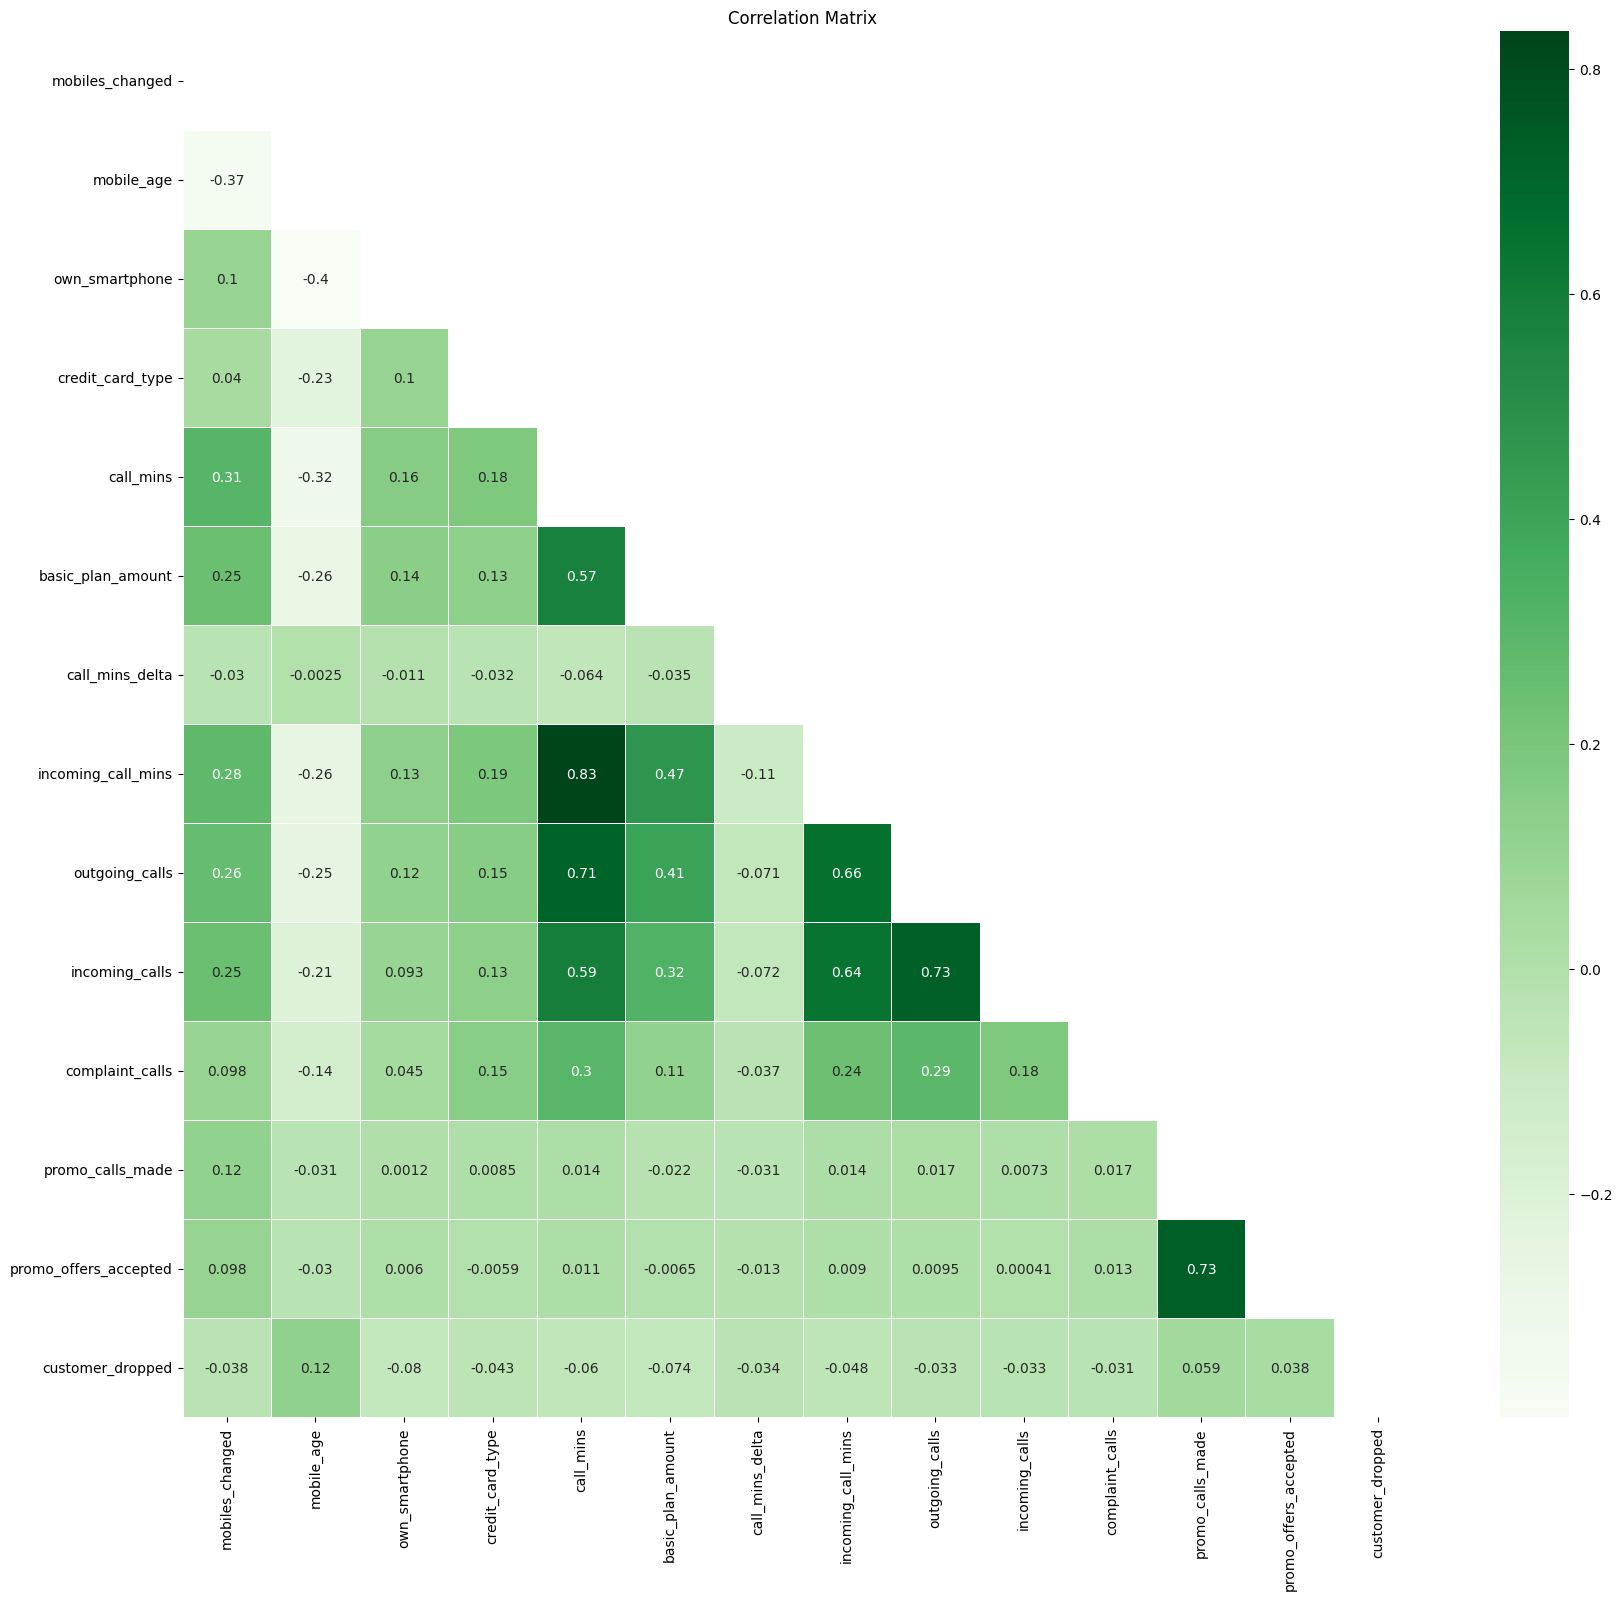

In [ ]:
# correlation matrix of the new dataframe
correlation_matrix = df_2.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Greens', linewidths=0.5, ax=ax)

plt.title('Correlation Matrix')

plt.show()

##Handling skewness

###Applying square root transformation to the features with positive skewness can potentially reduce the skewness and make the data more symmetric.

### However, it's important to note that this transformation can also affect the correlation between the features and the outcome variable. Therefore we will select the features that have the least correlation with the outcome variable

In [ ]:
# performing square root operation
df_2['mobiles_changed'] = np.sqrt(df_2['mobiles_changed'])
df_2['outgoing_calls'] = np.sqrt(df_2['outgoing_calls'])
df_2['incoming_calls'] = np.sqrt(df_2['incoming_calls'])
df_2['promo_offers_accepted'] = np.sqrt(df_2['promo_offers_accepted'])
df_2['complaint_calls'] = np.sqrt(df_2['complaint_calls'])


In [ ]:
skewness1 = df_2.skew()

<IPython.core.display.Javascript object>

In [ ]:
# compare from before
skewness_df = pd.concat([skewness, skewness1], axis=1)
skewness_df.columns = ['Original Skewness', 'New Skewness']
skewness_df

<IPython.core.display.Javascript object>

,Original Skewness,New Skewness
mobiles_changed,3.298662,1.746241
mobile_age,1.063724,1.063724
own_smartphone,-2.690953,-2.690953
credit_card_type,0.946191,0.946191
call_mins,2.431351,2.431351
basic_plan_amount,1.833946,1.833946
call_mins_delta,-0.312448,-0.312448
incoming_call_mins,3.274880,3.274880
outgoing_calls,4.011278,0.916227
incoming_calls,5.736811,1.607700


<IPython.core.display.Javascript object>

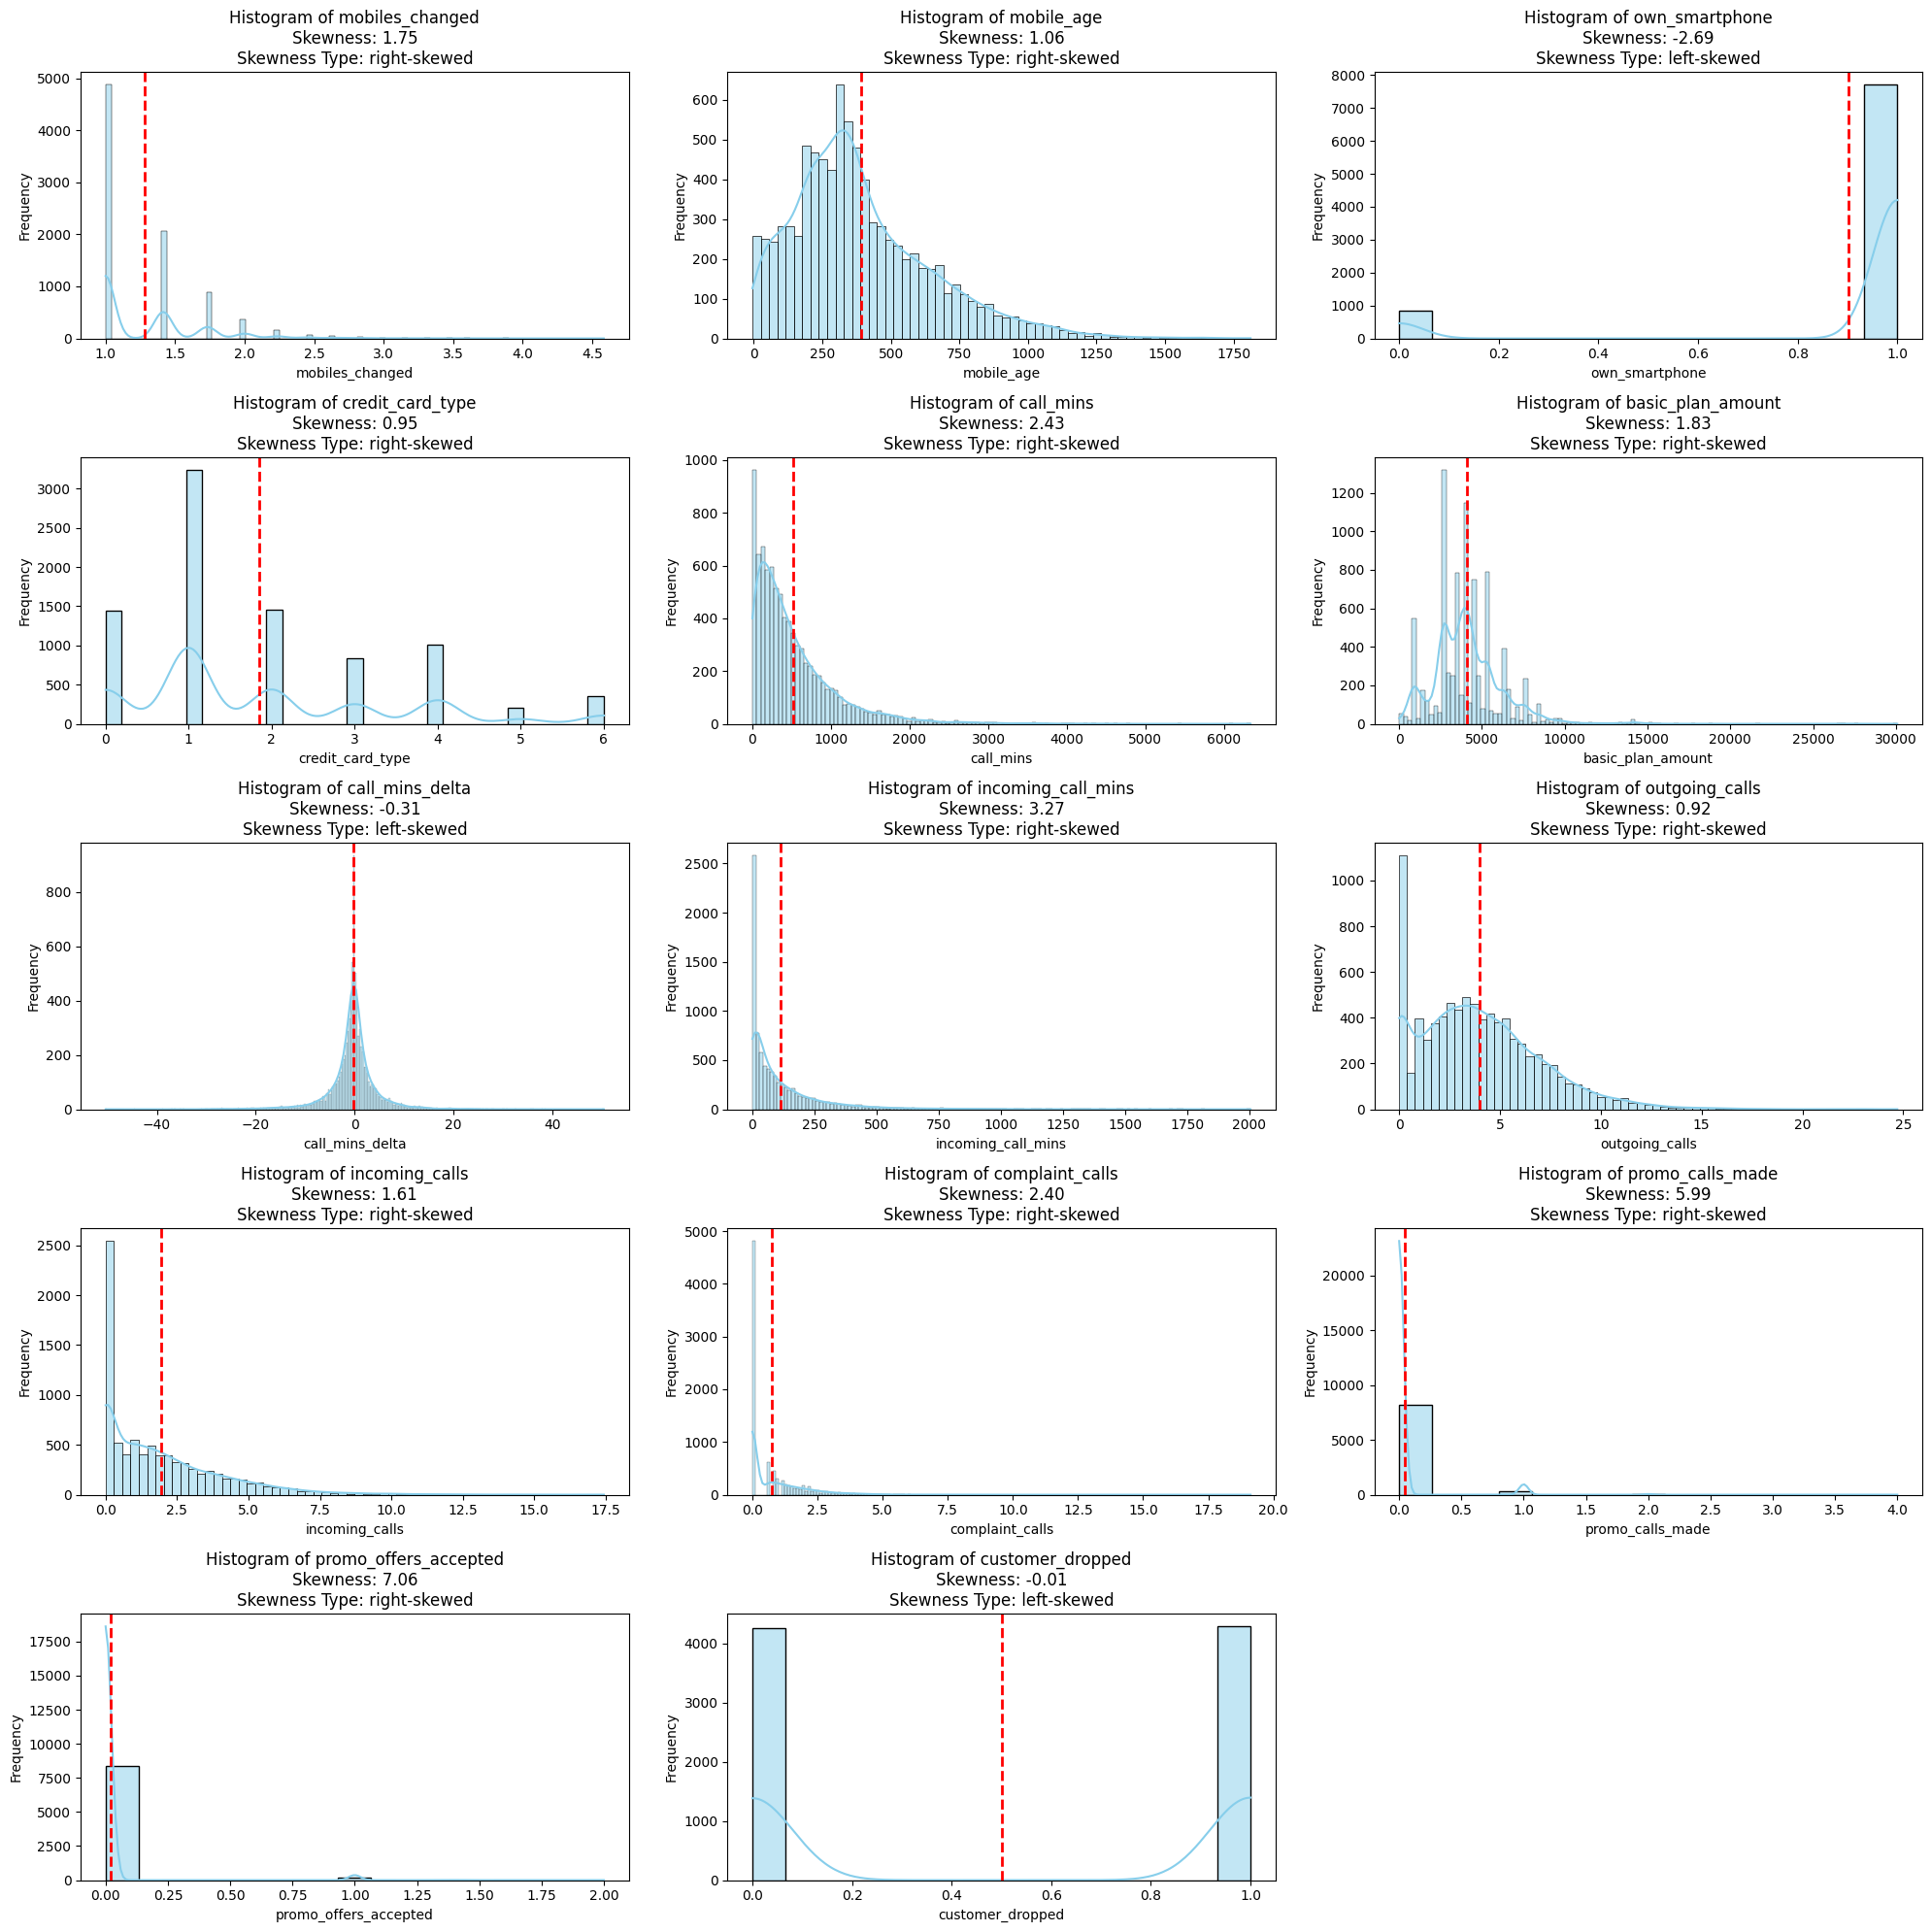

In [ ]:
# Plotting histogram to see the effect of square root transformation
n_cols = 3
n_rows = int(np.ceil(len(df_2.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(df_2.columns):
    col_skewness = stats.skew(df_2[col])
    
    if col_skewness > 0:
        skewness_type = 'right-skewed'
    elif col_skewness < 0:
        skewness_type = 'left-skewed'
    else:
        skewness_type = 'approximately symmetric'
    
    sns.histplot(df_2[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].axvline(df_2[col].mean(), color='red', linestyle='dashed', linewidth=2)
    
    axes[i].set_title("Histogram of {}\nSkewness: {:.2f}\nSkewness Type: {}".format(col, col_skewness, skewness_type))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(df_2.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Model building and Testing

In [ ]:
#Splitting the dataframe into X ( consisting of features) and Y (consisting of the target variable)
X = df_2.drop('customer_dropped', axis=1)
y = df_2['customer_dropped']

# Using scikit learn to split train test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<IPython.core.display.Javascript object>

We will be using Classification Report, Accuracy and Confusion Matrix for evaluating the performance. 

1. Classification Report: The classification report provides a comprehensive evaluation of the model's performance by computing various metrics such as precision, recall, F1-score, and support for each class. 

2. Accuracy: Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly predicted instances to the total number of instances.

3. Confusion Matrix: A confusion matrix is a tabular representation that displays the model's performance by comparing the actual and predicted labels. It provides information about true positives, true negatives, false positives, and false negatives.

### Naive Bayes Classification

In [ ]:
# Performing Naive Bayes Classification
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_nb = nb_classifier.predict(X_test)

<IPython.core.display.Javascript object>

The GaussianNB classifier does not have any adjustable parameters during initialization. It uses default values internally to perform its classification tasks.

In [ ]:
# classification report of model
classification_rep = classification_report(y_test, y_nb)
print("Classification Report:\n", classification_rep)

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       846
           1       0.58      0.27      0.37       864

    accuracy                           0.53      1710
   macro avg       0.55      0.53      0.50      1710
weighted avg       0.55      0.53      0.50      1710



From the report it can be determined that:

Precision: For class 0, the precision is 0.52, which means that out of all the samples predicted as class 0, 52% of them are actually class 0. For class 1, the precision is 0.58, indicating that 58% of the samples predicted as class 1 are truly class 1.

Recall: For class 0, the recall is 0.79, meaning that the model correctly identifies 79% of the actual class 0 samples. For class 1, the recall is 0.27, indicating that the model only captures 27% of the actual class 1 samples.

F1-score: For class 0, the F1-score is 0.63, and for class 1, it is 0.37.

In [ ]:
# accuracy of model
accuracy = accuracy_score(y_test, y_nb)
print("Accuracy:", accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.5309941520467836


In this report, the accuracy is 0.53, indicating that the model correctly predicts the class for 53% of the samples.

<IPython.core.display.Javascript object>

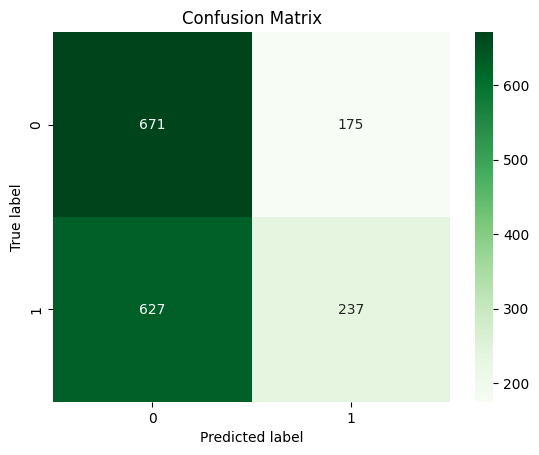

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_nb)


class_labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


True Positives (TP): There are 237 true positives, meaning the model correctly identified 237 samples as class 1.

True Negatives (TN): There are 671 true negatives, indicating that the model correctly identified 671 samples as class 0.

False Positives (FP): There are 175 false positives, meaning the model mistakenly classified 175 samples as class 1 when they were actually class 0.

False Negatives (FN): There are 627 false negatives, indicating that the model missed 627 samples that were actually class 1 and predicted them as class 0.

### Logistic Regression

In [ ]:
# Performing Logistic Regression Classification
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_log = logreg_model.predict(X_test)

<IPython.core.display.Javascript object>

The default parameters of the Logistic Regression Classification Model:

*   penalty: 'l2'
*   dual: False
*   tol: 0.0001
*   C: 1.0
*   fit_intercept: True
*   intercept_scaling: 1
*   class_weight: None
*   random_state: None
*   solver: 'lbfgs'
*   max_iter: 100


In [ ]:
# Classification Report of the model
classification_rep = classification_report(y_test, y_log)
print("Classification Report:\n", classification_rep)

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.59      0.58       846
           1       0.58      0.56      0.57       864

    accuracy                           0.57      1710
   macro avg       0.57      0.57      0.57      1710
weighted avg       0.57      0.57      0.57      1710



From the report it can be determined that:

Precision: For class 0, the precision is 0.56, which means that out of all the samples predicted as class 0, 56% of them are actually class 0. For class 1, the precision is 0.58, indicating that 58% of the samples predicted as class 1 are truly class 1.

Recall: For class 0, the recall is 0.59, meaning that the model correctly identifies 59% of the actual class 0 samples. For class 1, the recall is 0.56, indicating that the model captures 56% of the actual class 1 samples.

F1-score: For class 0, the F1-score is 0.58, and for class 1, it is 0.57.

In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_log)
print("Accuracy:", accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.571345029239766


In this report, the accuracy is 0.57, indicating that the model correctly predicts the class for 57% of the samples.

<IPython.core.display.Javascript object>

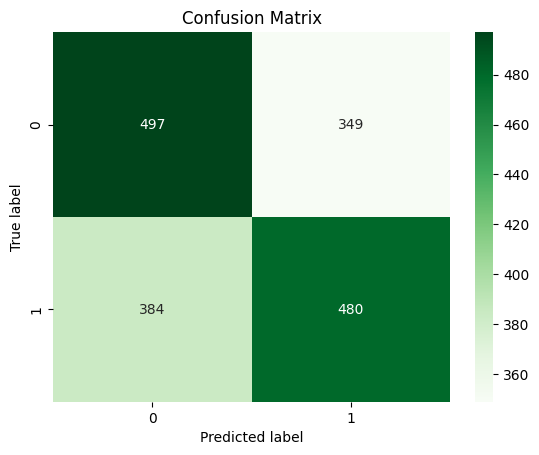

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_log)

class_labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


True Positives (TP): There are 480 true positives, meaning the model correctly identified 480 samples as class 1.

True Negatives (TN): There are 497 true negatives, indicating that the model correctly identified 497 samples as class 0.

False Positives (FP): There are 1349 false positives, meaning the model mistakenly classified 349 samples as class 1 when they were actually class 0.

False Negatives (FN): There are 384 false negatives, indicating that the model missed 384 samples that were actually class 1 and predicted them as class 0.

### Decision tree classifier

In [ ]:
# Performing Decision Tree Classification
dt_classifier = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=8,  
    min_samples_split=10, 
    min_samples_leaf=5, 
    max_leaf_nodes=20, 
    random_state=42,  
)

dt_classifier.fit(X_train, y_train)
y_dt = dt_classifier.predict(X_test)

<IPython.core.display.Javascript object>

Parameters of the Decision Tree Classification model:

*   criterion: 'gini'
*   max_depth: 8
*   min_samples_split: 10
*   min_samples_leaf: 5
*   max_leaf_nodes: 20
*   random_state: 42

In [ ]:
# Classification Report of the model
classification_rep = classification_report(y_test, y_dt)
print("Classification Report:\n", classification_rep)

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53       846
           1       0.57      0.67      0.62       864

    accuracy                           0.58      1710
   macro avg       0.58      0.57      0.57      1710
weighted avg       0.58      0.58      0.57      1710



From the report it can be determined that:

Precision: For class 0, the precision is 0.59, which means that out of all the samples predicted as class 0, 59% of them are actually class 0. For class 1, the precision is 0.57, indicating that 57% of the samples predicted as class 1 are truly class 1.

Recall: For class 0, the recall is 0.48, meaning that the model correctly identifies 48% of the actual class 0 samples. For class 1, the recall is 0.67, indicating that the model captures 67% of the actual class 1 samples.

F1-score: For class 0, the F1-score is 0.53, and for class 1, it is 0.62.

In [ ]:
accuracy = accuracy_score(y_test, y_dt)
print("Accuracy:", accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.5760233918128655


In this report, the accuracy is 0.58, indicating that the model correctly predicts the class for 58% of the samples.

<IPython.core.display.Javascript object>

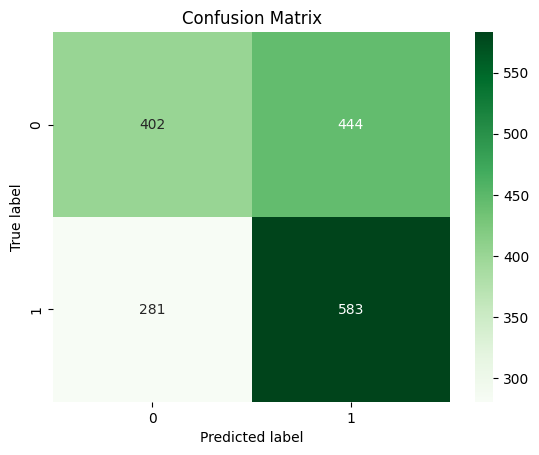

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_dt)

class_labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


True Positives (TP): There are 583 true positives, meaning the model correctly identified 583 samples as class 1.

True Negatives (TN): There are 402 true negatives, indicating that the model correctly identified 402 samples as class 0.

False Positives (FP): There are 444 false positives, meaning the model mistakenly classified 444 samples as class 1 when they were actually class 0.

False Negatives (FN): There are 281 false negatives, indicating that the model missed 281 samples that were actually class 1 and predicted them as class 0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import graphviz

# Export decision tree as dot file
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=X.columns, class_names=['False', 'True'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)

# Save decision tree as PNG image
graph.format = 'png'
graph.render('decision_tree')

<IPython.core.display.Javascript object>

'decision_tree.png'

<IPython.core.display.Javascript object>

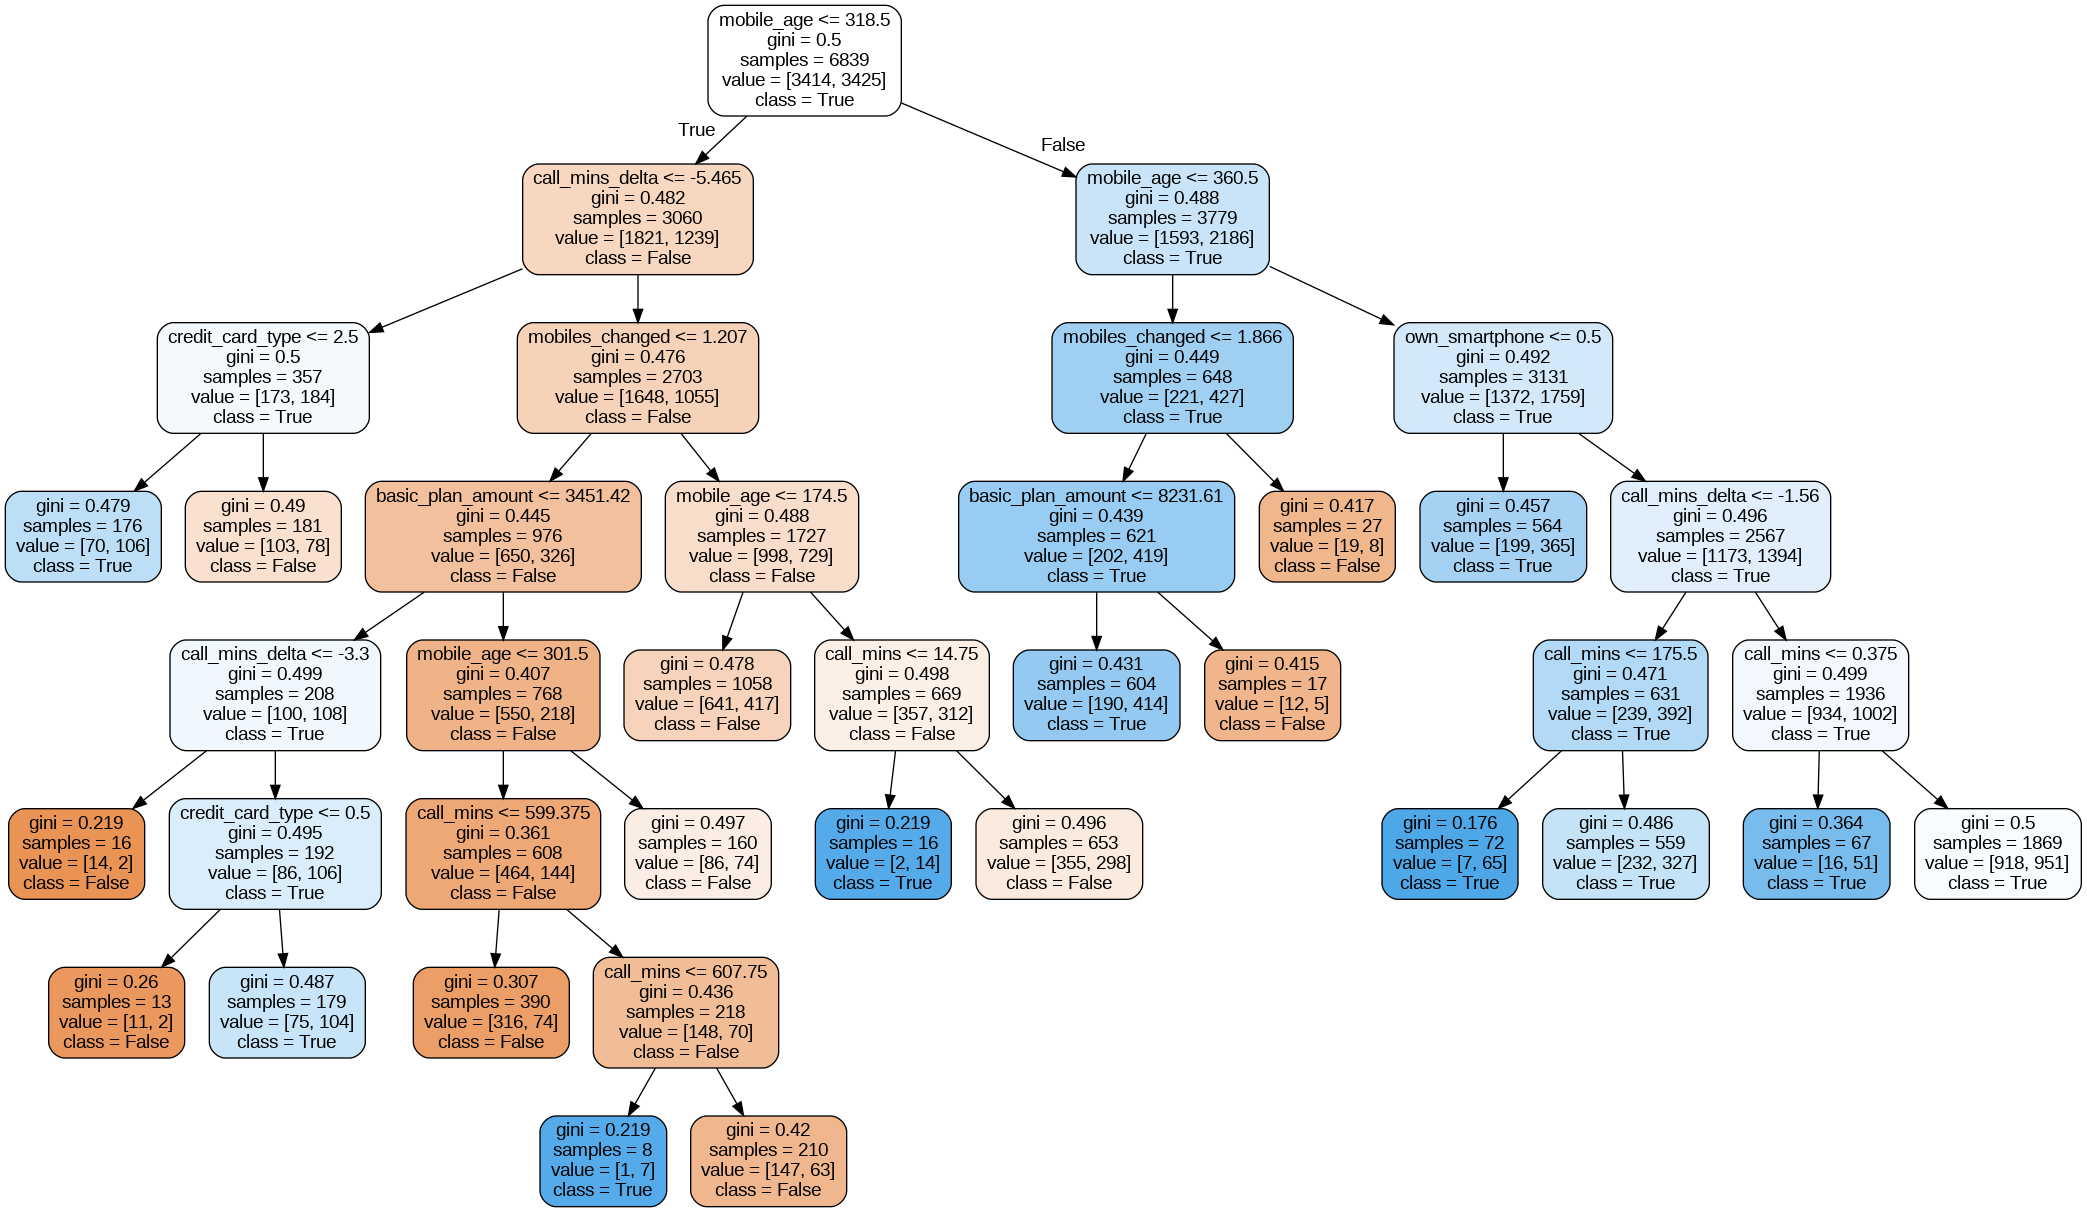

In [ ]:
from PIL import Image
# Open the saved image using PIL
image = Image.open('decision_tree.png')

# Display the image in a new window
image.show()

### Random Forest Classifier

In [ ]:
# Performing Random Tree Classification
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split=10, min_samples_leaf=5)
rf_classifier.fit(X_train, y_train)
y_rf = rf_classifier.predict(X_test)

<IPython.core.display.Javascript object>

Random Forest Classification model parameters:
*   n_estimators: 500
*   max_depth: 6
*   min_samples_split: 10
*   min_samples_leaf: 5




In [ ]:
# Classification Report of the model
classification_rep = classification_report(y_test, y_rf)
print("Classification Report:\n", classification_rep)

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56       846
           1       0.58      0.64      0.61       864

    accuracy                           0.58      1710
   macro avg       0.59      0.58      0.58      1710
weighted avg       0.59      0.58      0.58      1710



From the report it can be determined that:

Precision: For class 0, the precision is 0.59, which means that out of all the samples predicted as class 0, 59% of them are actually class 0. For class 1, the precision is 0.58, indicating that 58% of the samples predicted as class 1 are truly class 1.

Recall: For class 0, the recall is 0.53, meaning that the model correctly identifies 53% of the actual class 0 samples. For class 1, the recall is 0.64, indicating that the model captures 64% of the actual class 1 samples.

F1-score: For class 0, the F1-score is 0.56, and for class 1, it is 0.61.

In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_rf)
print("Accuracy:", accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.5847953216374269


In this report, the accuracy is 0.59, indicating that the model correctly predicts the class for 59% of the samples.

<IPython.core.display.Javascript object>

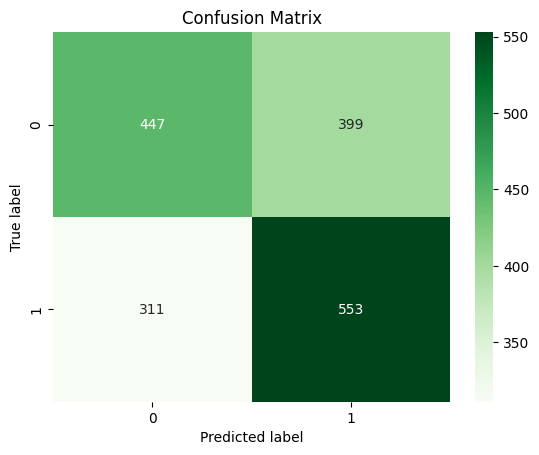

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_rf)

class_labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


True Positives (TP): There are 554 true positives, meaning the model correctly identified 554 samples as class 1.

True Negatives (TN): There are 451 true negatives, indicating that the model correctly identified 451 samples as class 0.

False Positives (FP): There are 395 false positives, meaning the model mistakenly classified 395 samples as class 1 when they were actually class 0.

False Negatives (FN): There are 310 false negatives, indicating that the model missed 310 samples that were actually class 1 and predicted them as class 0.

## Comparing the models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

models = [
    ("Naive Bayes", nb_classifier),
    ("Logistic Regression", logreg_model),
    ("Decision Tree", dt_classifier),
    ("Random Forest", rf_classifier)
]

model_names = []
accuracy_train = []
accuracy_test = []
precision = []
recall = []
f1 = []

for model_name, model in models:

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_names.append(model_name)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test, average='weighted'))
    recall.append(recall_score(y_test, y_pred_test, average='weighted'))
    f1.append(f1_score(y_test, y_pred_test, average='weighted'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

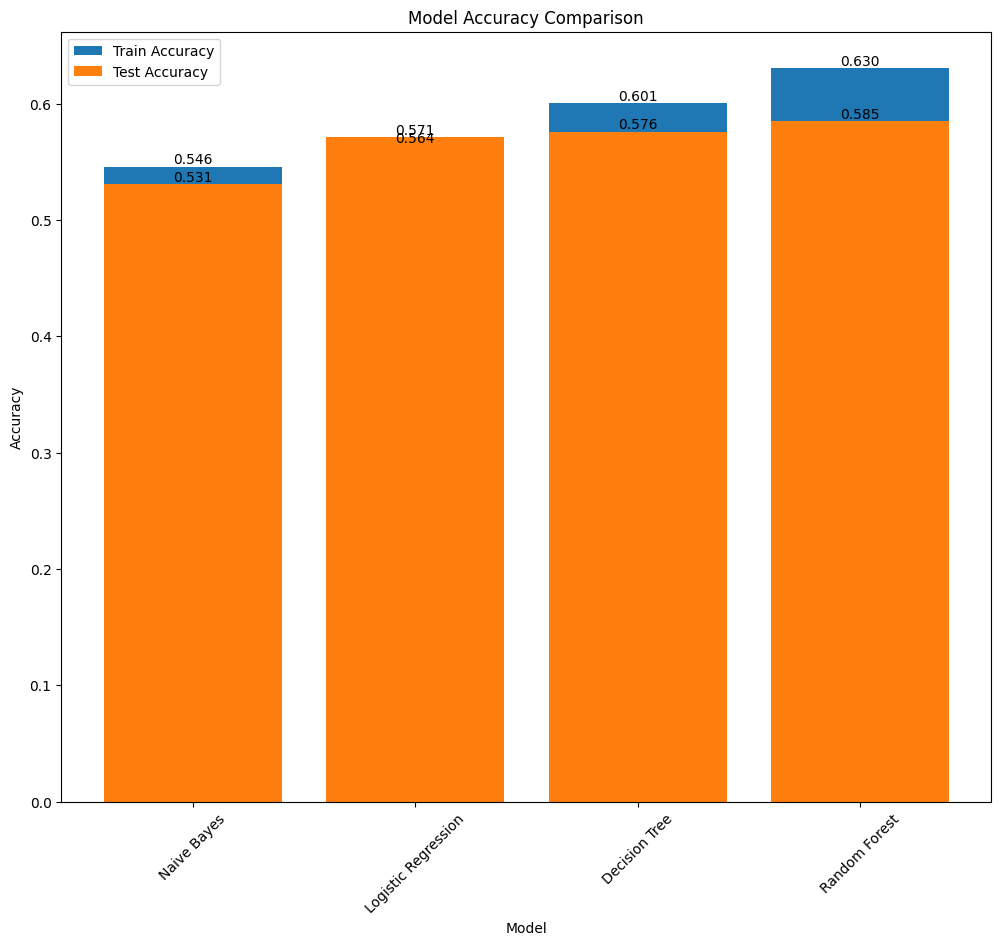

In [ ]:
#Plotting Training and Testing Score
plt.figure(figsize=(12, 10))
plt.bar(model_names, accuracy_train, label="Train Accuracy")
plt.bar(model_names, accuracy_test, label="Test Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.xticks(rotation=45)

for i in range(len(model_names)):
    plt.text(i, accuracy_train[i], f"{accuracy_train[i]:.3f}", ha='center', va='bottom')
    plt.text(i, accuracy_test[i], f"{accuracy_test[i]:.3f}", ha='center', va='bottom')

plt.show()

From the graph it can be concluded that the training and testing scores for each of the models is close, so none of the models is overfitting

<IPython.core.display.Javascript object>

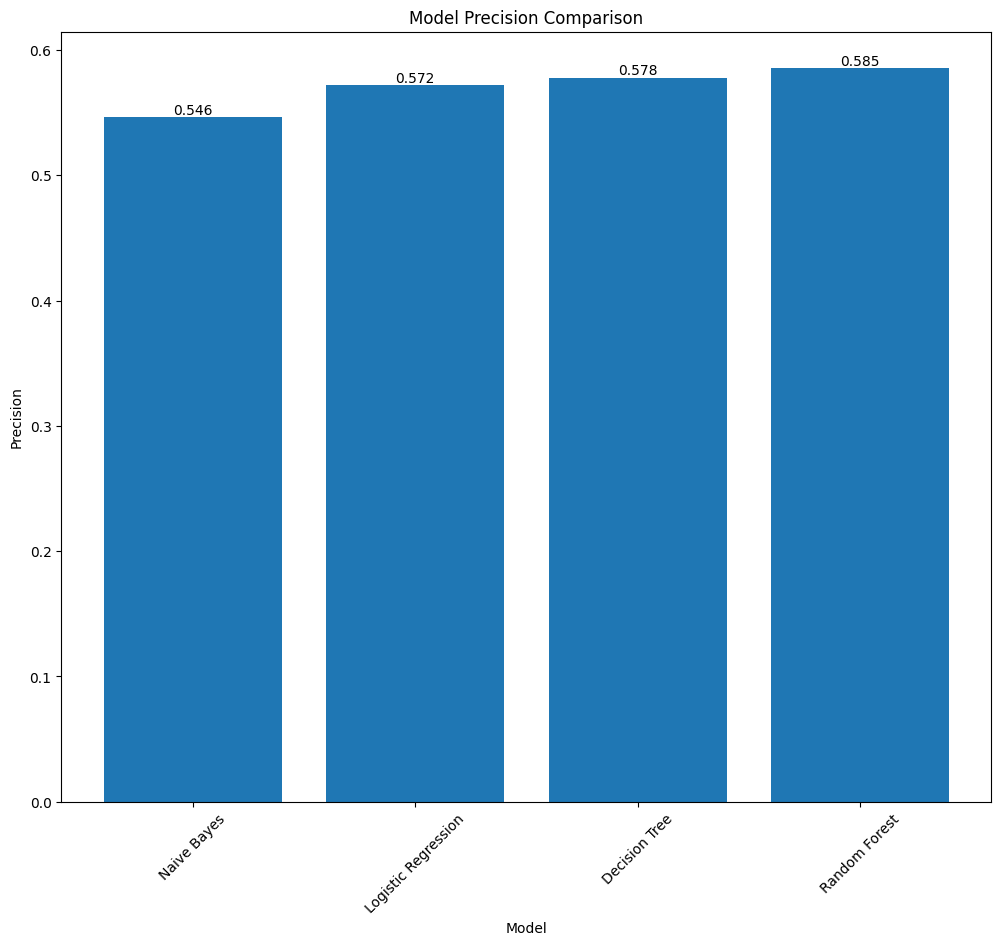

In [ ]:
#Plotting Precision Scores
plt.figure(figsize=(12, 10))
plt.bar(model_names, precision)
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Model Precision Comparison")
plt.xticks(rotation=45)

for i in range(len(model_names)):
    plt.text(i, precision[i], f"{precision[i]:.3f}", ha='center', va='bottom')

plt.show()

From the graph it can be concluded that Random Forest has the highest precision score

<IPython.core.display.Javascript object>

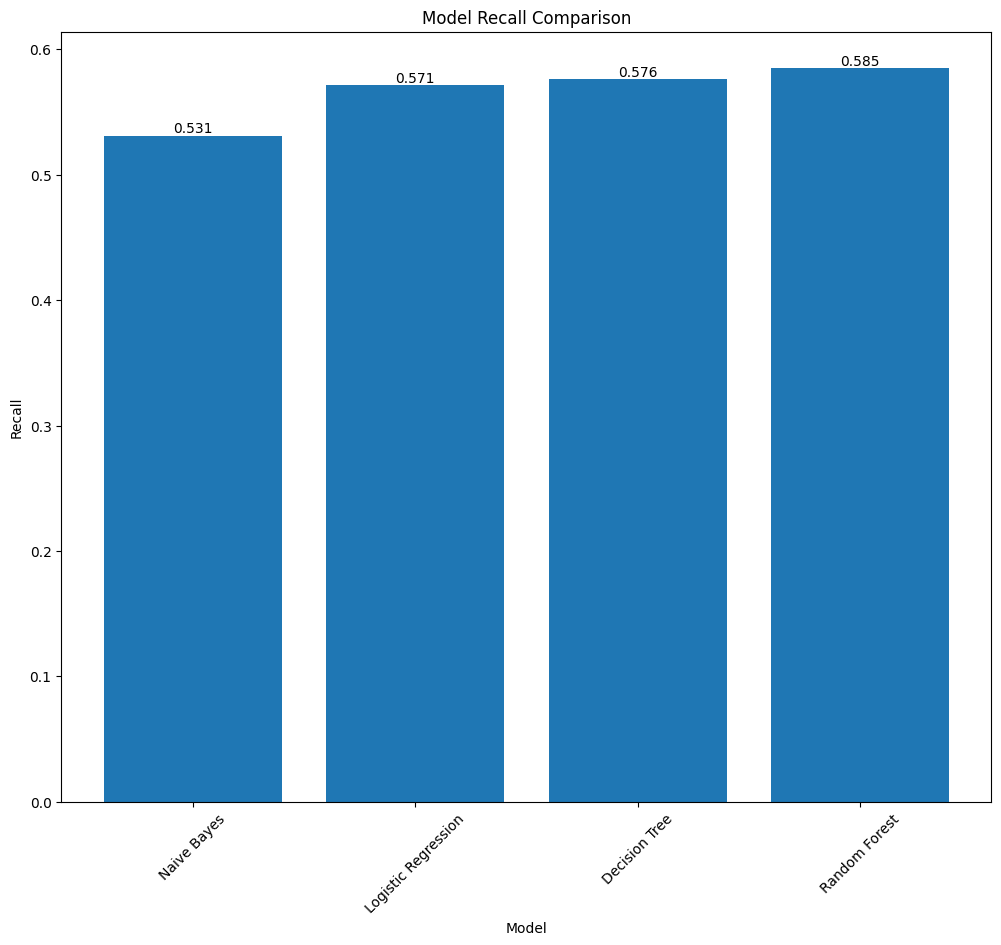

In [ ]:
#Plotting Recall Scores
plt.figure(figsize=(12, 10))
plt.bar(model_names, recall)
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Model Recall Comparison")
plt.xticks(rotation=45)

for i in range(len(model_names)):
    plt.text(i, recall[i], f"{recall[i]:.3f}", ha='center', va='bottom')

plt.show()

From the graph it can be concluded that Random Forest has the highest recall score

<IPython.core.display.Javascript object>

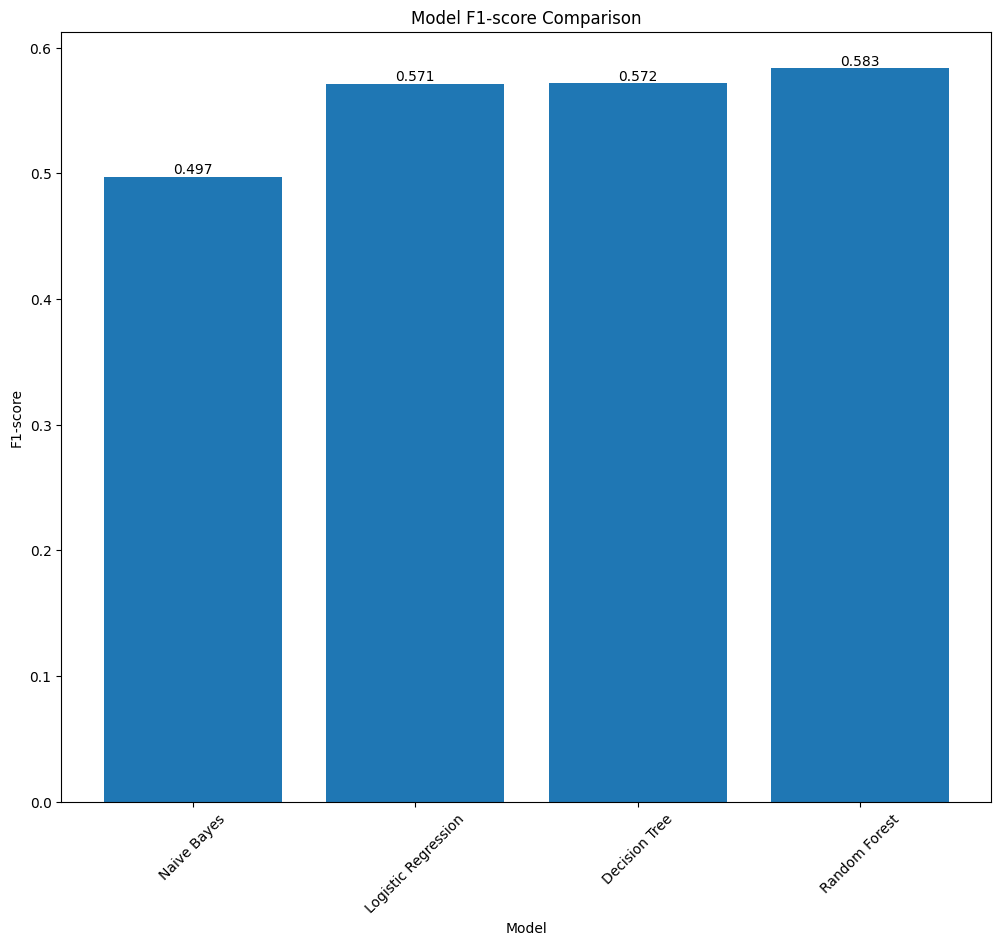

In [ ]:
#Plotting F1 Scores
plt.figure(figsize=(12, 10))
plt.bar(model_names, f1)
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.title("Model F1-score Comparison")
plt.xticks(rotation=45)

for i in range(len(model_names)):
    plt.text(i, f1[i], f"{f1[i]:.3f}", ha='center', va='bottom')

plt.show()

From the graph it can be concluded that Random Forest has the highest F1 score

<IPython.core.display.Javascript object>

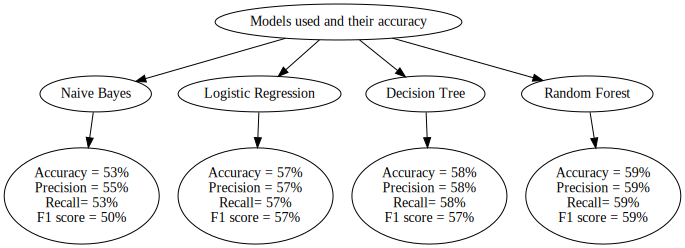

In [ ]:
#graphviz diagram summarizing the results of 4 models
from graphviz import Digraph

dot = Digraph()

dot.node('W', 'Models used and their accuracy')
dot.node('L', 'Naive Bayes')
dot.node('M', 'Logistic Regression')
dot.node('N', 'Decision Tree')
dot.node('O', 'Random Forest')

dot.edges(['WL', 'WM', 'WN','WO'])

dot.node('a', '''Accuracy = 53%
Precision = 55%
Recall= 53%
F1 score = 50%''')
dot.node('b', '''Accuracy = 57%
Precision = 57%
Recall= 57%
F1 score = 57%''')
dot.node('c', '''Accuracy = 58%
Precision = 58%
Recall= 58%
F1 score = 57%''')
dot.node('d', '''Accuracy = 59%
Precision = 59%
Recall= 59%
F1 score = 59%''')
dot.edges(['La', 'Mb', 'Nc','Od'])

dot.render('output/model.jpg', view = False)
dot

## Hyper Parameter Tuning

Since Random forest classification model gives the highest precision, recall, f1 score and accuracy among the models, we will select it and perform hyper paramter tuning to improve the accuracy more

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [6, 8, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    'bootstrap': [True],
    'oob_score': [True]
}

# Create the RandomForestClassifier
rf_classifier1 = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier1 , param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)




In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

<IPython.core.display.Javascript object>

Best Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500, 'oob_score': True, 'random_state': 42}
Accuracy: 0.5953216374269006


The best parameters chosen are 

*   bootstrap': True, 
*   max_depth': 8, 
*   'max_features': 'auto', 
*   'min_samples_leaf': 10, 
*   'min_samples_split': 10, 
*   'n_estimators': 500, 
*   'oob_score': True, 
*   'random_state': 42

In this report, the accuracy is 0.60, indicating that the model correctly predicts the class for 60% of the samples.



In [ ]:
# Classification Report of the model
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

<IPython.core.display.Javascript object>

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57       846
           1       0.59      0.64      0.61       864

    accuracy                           0.60      1710
   macro avg       0.60      0.59      0.59      1710
weighted avg       0.60      0.60      0.59      1710



From the report it can be determined that:

Precision: For class 0, the precision is 0.60, which means that out of all the samples predicted as class 0, 60% of them are actually class 0. For class 1, the precision is 0.59, indicating that 59% of the samples predicted as class 1 are truly class 1.

Recall: For class 0, the recall is 0.55, meaning that the model correctly identifies 55% of the actual class 0 samples. For class 1, the recall is 0.64, indicating that the model captures 64% of the actual class 1 samples.

F1-score: For class 0, the F1-score is 0.57, and for class 1, it is 0.61.

<IPython.core.display.Javascript object>

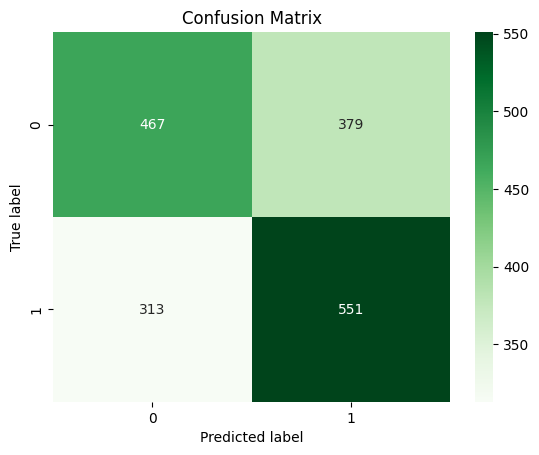

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


True Positives (TP): There are 551 true positives, meaning the model correctly identified 551 samples as class 1.

True Negatives (TN): There are 467 true negatives, indicating that the model correctly identified 467 samples as class 0.

False Positives (FP): There are 379 false positives, meaning the model mistakenly classified 379 samples as class 1 when they were actually class 0.

False Negatives (FN): There are 313 false negatives, indicating that the model missed 313 samples that were actually class 1 and predicted them as class 0.